
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

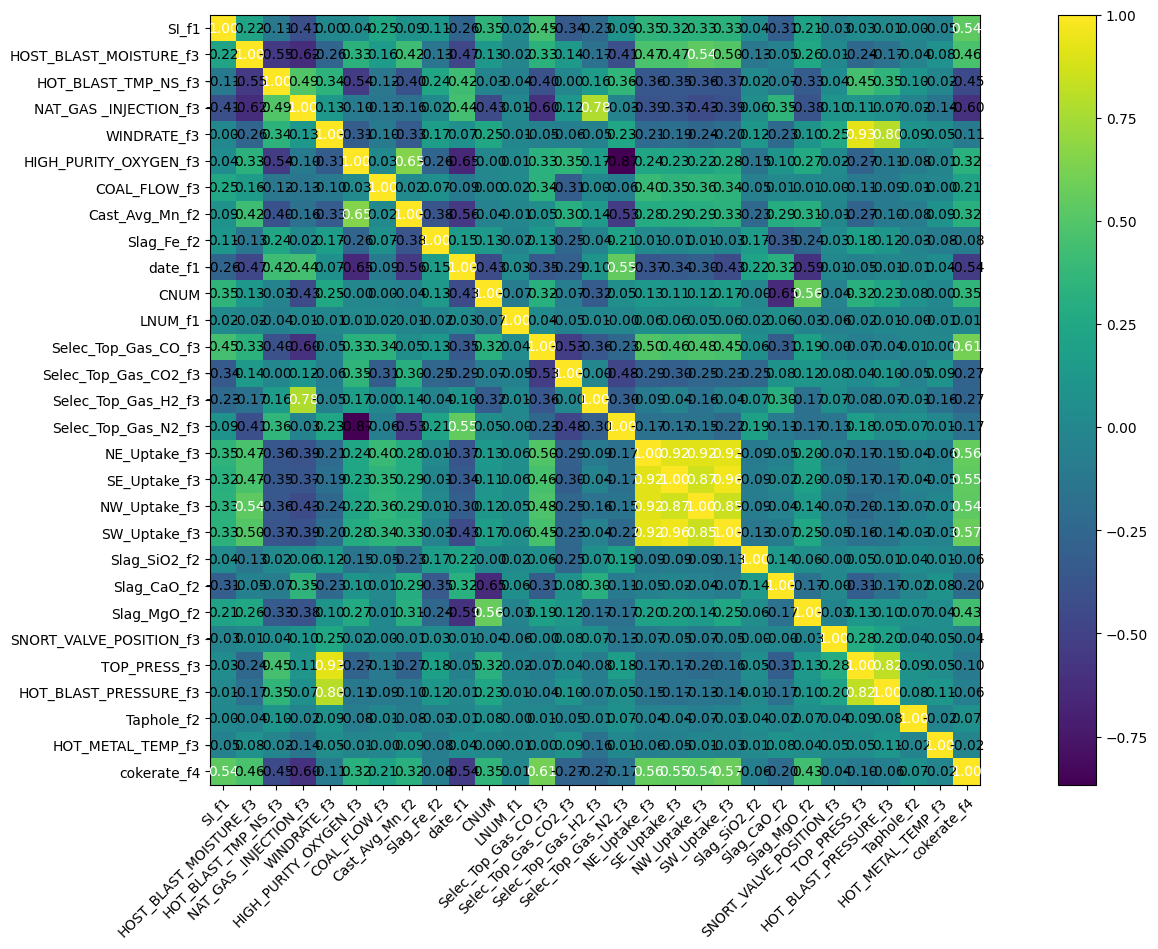

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

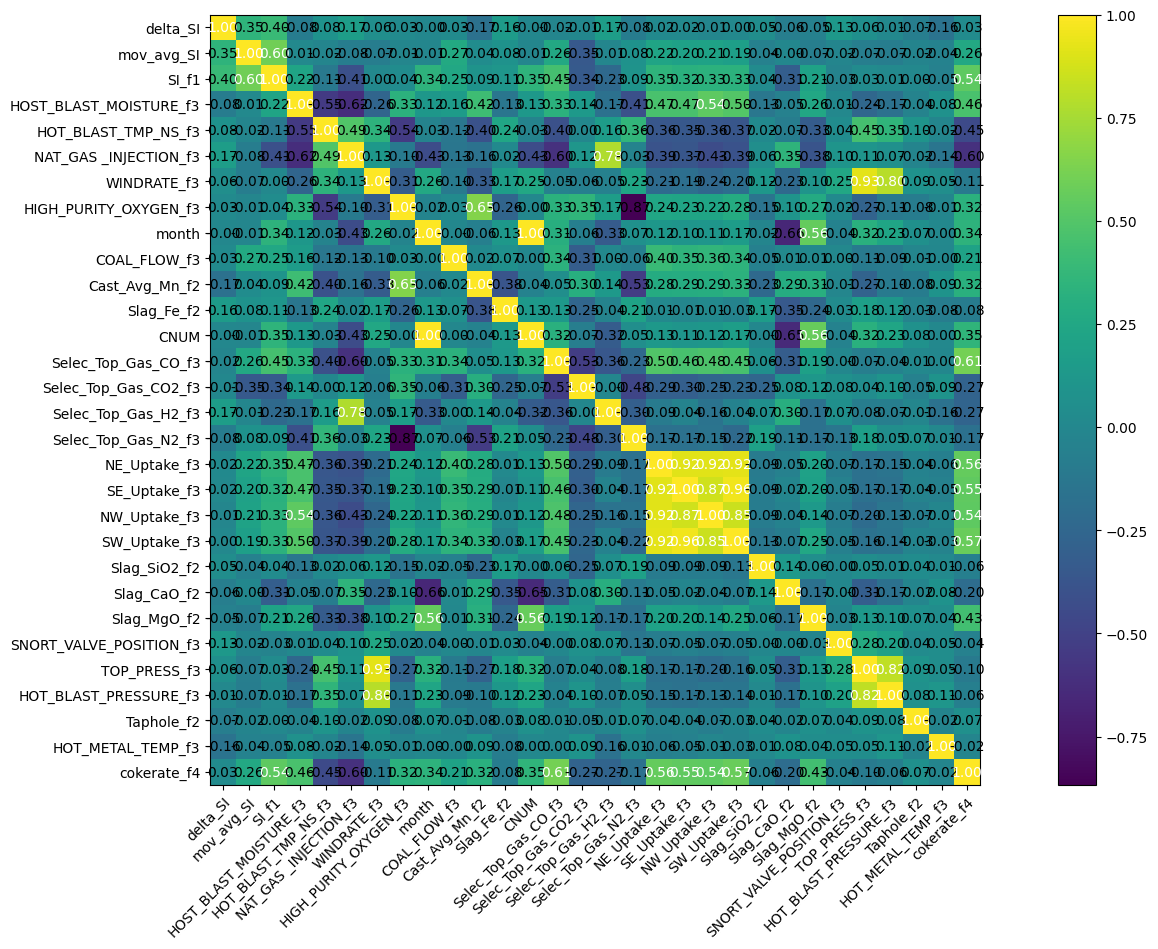

In [16]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [17]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [18]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        # === Forward Pass with Reasoning Mode ===
        pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
   
        loss_SI  = criterion(pred_si, y_si)
        ## loss_SI  = criterion(pred[:, 2], y_train[:, 2])       # special loss on feature 2
        
        loss_all = criterion(pred, y_train)

        ####################################################################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ## loss_total = loss_SI 

        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [19]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

## x[1, 1, 2:3]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n## x[1, 1, 2:3]\n\n'

In [20]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.239110
Loss_SI: 1.2462214231491089 Loss_all: 1.1751062870025635
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.097886
Loss_SI: 0.04353804886341095 Loss_all: 0.5870199799537659
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.054639
Loss_SI: 0.017500508576631546 Loss_all: 0.38888052105903625
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.045762
Loss_SI: 0.017548086121678352 Loss_all: 0.299690306186676
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.025900
Loss_SI: 0.010341932997107506 Loss_all: 0.1659211814403534
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.028481
Loss_SI: 0.013449184596538544 Loss_all: 0.16377094388008118
Prediction shape: torch.Size([32, 35])
===


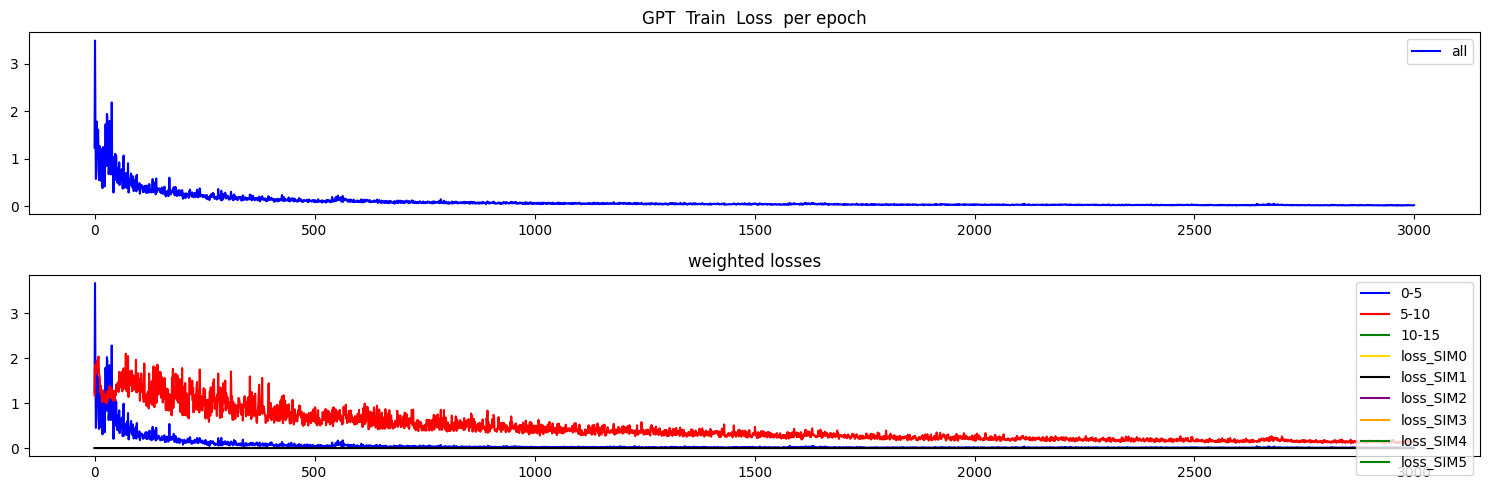

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


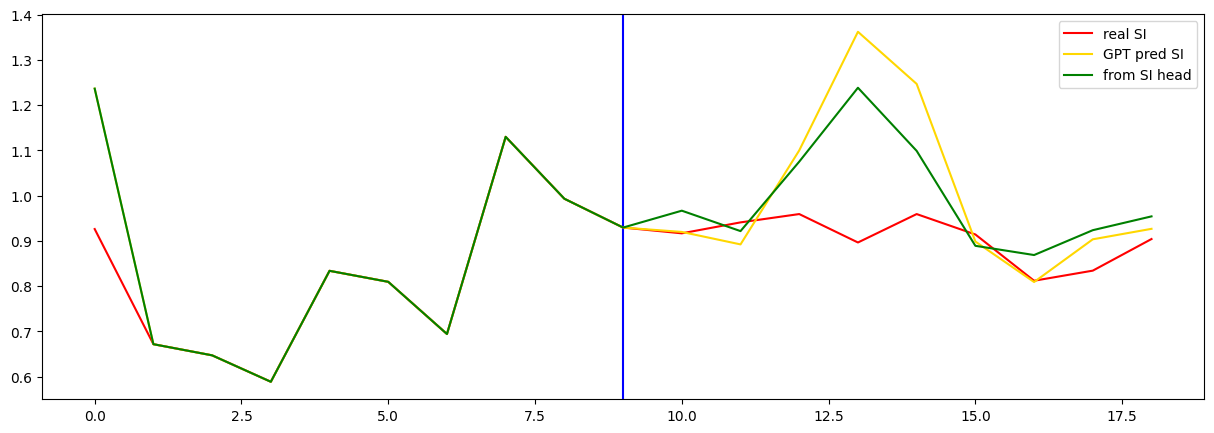

Testing R**2 - (all) - (no inputs):  0.9573472364936405
Testing R**2 - (f2) - SI full (no inputs):  -14.26118543546686
0 ...index R**2 (no inputs):  -13.67644814845645
1 ...index R**2 (no inputs):  -0.5211096545283043
2 ...index R**2 (no inputs):  -14.26118543546686
3 ...index R**2 (no inputs):  -108.0554393853706
4 ...index R**2 (no inputs):  -3301.4284801386702
5 ...index R**2 (no inputs):  -165.6092914797928
6 ...index R**2 (no inputs):  -39.9898197195809
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3124194058009173
10 ...index R**2 (no inputs):  0.26185893513874803
11 ...index R**2 (no inputs):  -957.0565077131821
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -22.716148656029755
16 ...index R**2 (no inputs):  -10.937984996076501
17 ...index R**2 (no inputs):  -268.2013827073368
18 ...index R**2 (no inputs):  -21.81474995743852
19 ...index

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.306507
Loss_SI: 1.3067089319229126 Loss_all: 1.3046936988830566
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.378152
Loss_SI: 0.32528263330459595 Loss_all: 0.8539737462997437
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.141973
Loss_SI: 0.07700248062610626 Loss_all: 0.7267047166824341
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.096584
Loss_SI: 0.024470150470733643 Loss_all: 0.745607316493988
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.096701
Loss_SI: 0.03572801128029823 Loss_all: 0.6454570293426514
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.075763
Loss_SI: 0.027632907032966614 Loss_all: 0.508938729763031
Prediction shape: torch.Size([32, 35])
===


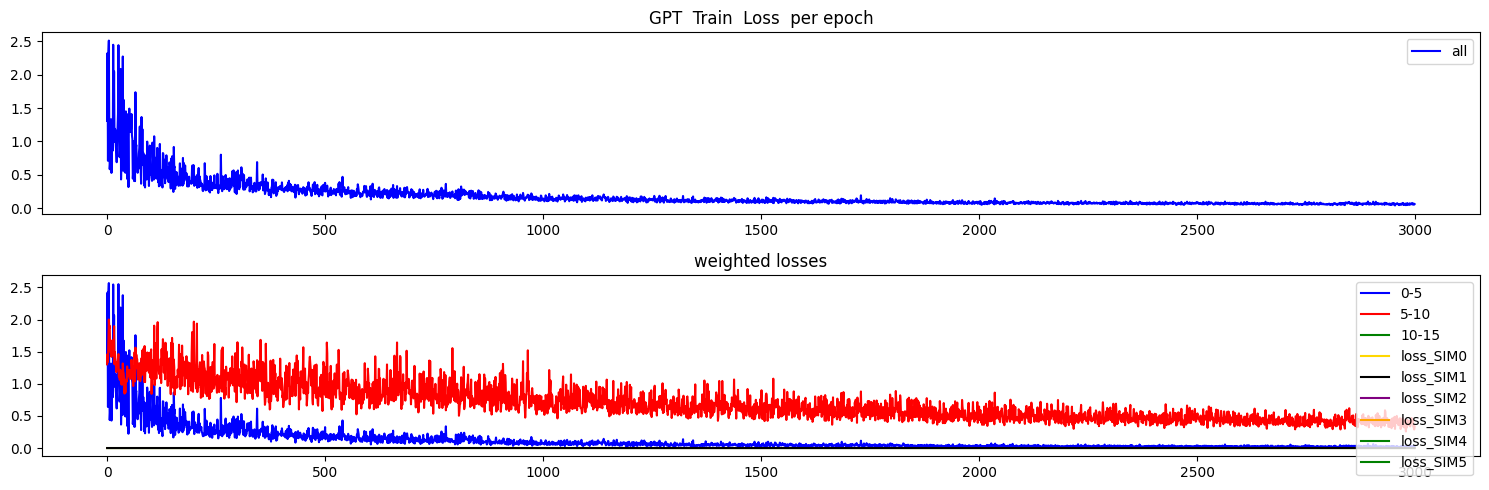

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


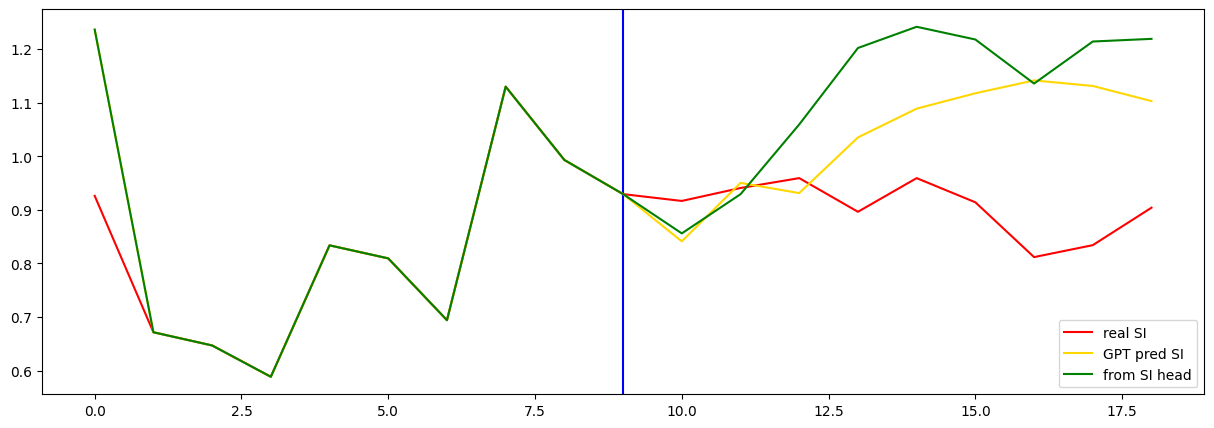

Testing R**2 - (all) - (no inputs):  0.9761334072274984
Testing R**2 - (f2) - SI full (no inputs):  -13.831663887857147
0 ...index R**2 (no inputs):  -7.414287272648773
1 ...index R**2 (no inputs):  -2.420120772526872
2 ...index R**2 (no inputs):  -13.831663887857147
3 ...index R**2 (no inputs):  -57.43363831738705
4 ...index R**2 (no inputs):  -369.9435879510128
5 ...index R**2 (no inputs):  -90.48076258807544
6 ...index R**2 (no inputs):  -29.793551005115916
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.26862668428461745
10 ...index R**2 (no inputs):  0.08317868006362317
11 ...index R**2 (no inputs):  -2238.904598656426
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -14.205604714860312
16 ...index R**2 (no inputs):  -4.197524708696532
17 ...index R**2 (no inputs):  -2277.8481496362665
18 ...index R**2 (no inputs):  -9.140855701565787
19 ...in

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


[0] Train Loss: 0.595656
Loss_SI: 0.5533479452133179 Loss_all: 0.9764321446418762
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.381349
Loss_SI: 0.3015582859516144 Loss_all: 1.0994664430618286
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.171878
Loss_SI: 0.10251815617084503 Loss_all: 0.7961168885231018
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.135852
Loss_SI: 0.052845217287540436 Loss_all: 0.8829147219657898
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.097846
Loss_SI: 0.036804310977458954 Loss_all: 0.6472218632698059
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.093855
Loss_SI: 0.05419832095503807 Loss_all: 0.4507642984390259
Prediction shape: torch.Size([32, 35])
===


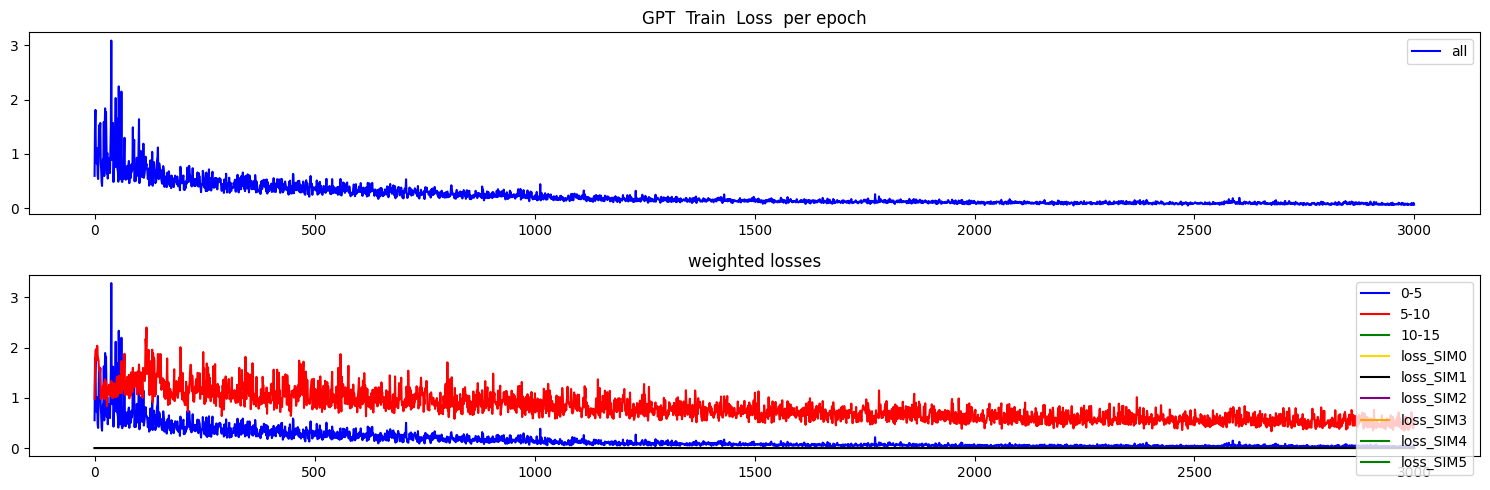

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


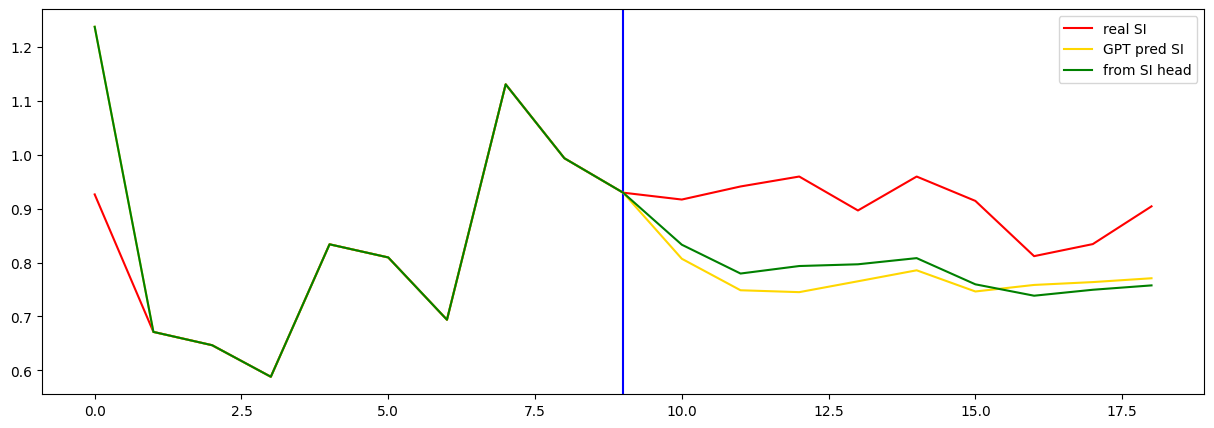

Testing R**2 - (all) - (no inputs):  0.9591608198564875
Testing R**2 - (f2) - SI full (no inputs):  -7.989110122276804
0 ...index R**2 (no inputs):  -5.402598244226009
1 ...index R**2 (no inputs):  -1.7248700375085604
2 ...index R**2 (no inputs):  -7.989110122276804
3 ...index R**2 (no inputs):  -0.6454501024144401
4 ...index R**2 (no inputs):  -198.77312129156437
5 ...index R**2 (no inputs):  -156.76205251152595
6 ...index R**2 (no inputs):  -12.747138853350803
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.631508740126691
10 ...index R**2 (no inputs):  0.019916483498877646
11 ...index R**2 (no inputs):  -1623.1068682561252
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.49504946943118
16 ...index R**2 (no inputs):  -4.741702407927475
17 ...index R**2 (no inputs):  -4266.507182502937
18 ...index R**2 (no inputs):  -24.234005368339208
19 ...in

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.758021
Loss_SI: 0.7389873266220093 Loss_all: 0.9293245673179626
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.412676
Loss_SI: 0.3532724976539612 Loss_all: 0.9473084807395935
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.317374
Loss_SI: 0.26144975423812866 Loss_all: 0.8206895589828491
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.280493
Loss_SI: 0.2195778787136078 Loss_all: 0.8287315964698792
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.147044
Loss_SI: 0.10306002199649811 Loss_all: 0.5428988933563232
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.144234
Loss_SI: 0.09762938320636749 Loss_all: 0.5636793971061707
Prediction shape: torch.Size([32, 35])
===


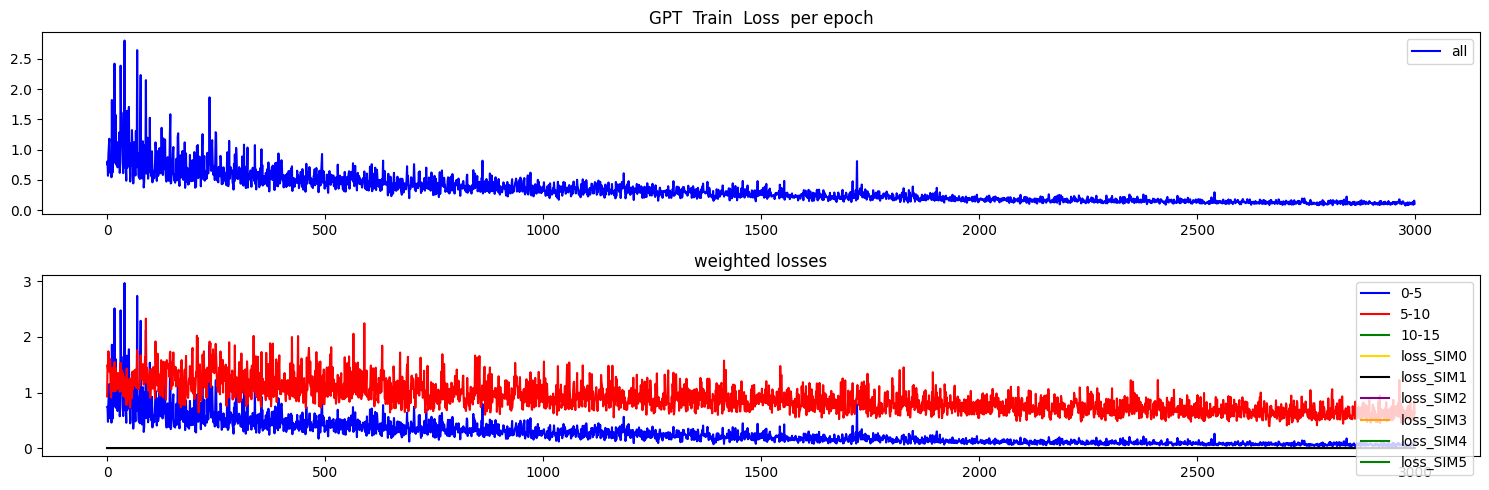

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


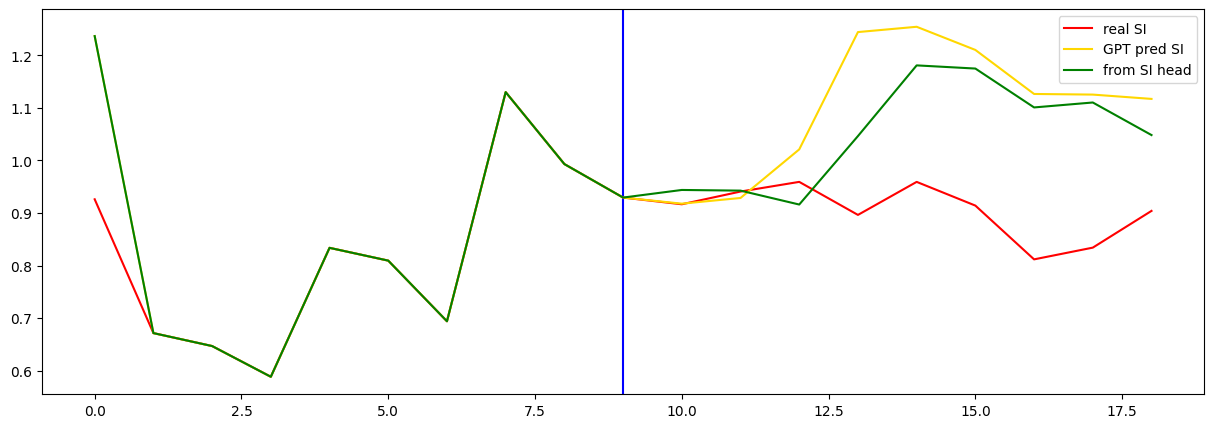

Testing R**2 - (all) - (no inputs):  0.9912873028474163
Testing R**2 - (f2) - SI full (no inputs):  -24.312594071187178
0 ...index R**2 (no inputs):  -5.2953053506460614
1 ...index R**2 (no inputs):  -4.085340954812331
2 ...index R**2 (no inputs):  -24.312594071187178
3 ...index R**2 (no inputs):  -9.512694255338433
4 ...index R**2 (no inputs):  -1383.0226700252613
5 ...index R**2 (no inputs):  -32.39117971308523
6 ...index R**2 (no inputs):  -33.787728655516034
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.106305567280784
10 ...index R**2 (no inputs):  -0.14607102148875395
11 ...index R**2 (no inputs):  -1385.0183483374844
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.4774635599369716
16 ...index R**2 (no inputs):  -1.3923098649871273
17 ...index R**2 (no inputs):  -775.013994173795
18 ...index R**2 (no inputs):  -13.703332388658634
19 ...

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



## Run 2


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.088653
Loss_SI: 1.0766780376434326 Loss_all: 1.1964285373687744
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.136426
Loss_SI: 0.04633786529302597 Loss_all: 0.9472172260284424
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.096830
Loss_SI: 0.033451009541749954 Loss_all: 0.6672444939613342
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.053730
Loss_SI: 0.014102229848504066 Loss_all: 0.41037529706954956
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031415
Loss_SI: 0.005736905615776777 Loss_all: 0.26251792907714844
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.025695
Loss_SI: 0.010416610166430473 Loss_all: 0.16320253908634186
Prediction shape: torch.Size([32, 35])
===


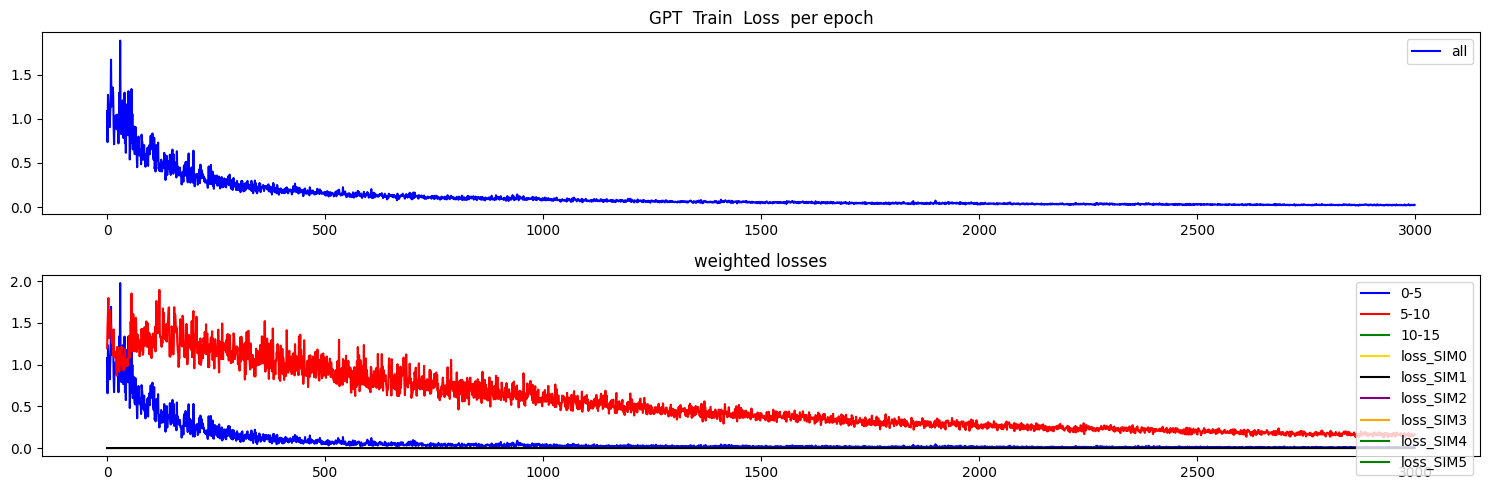

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


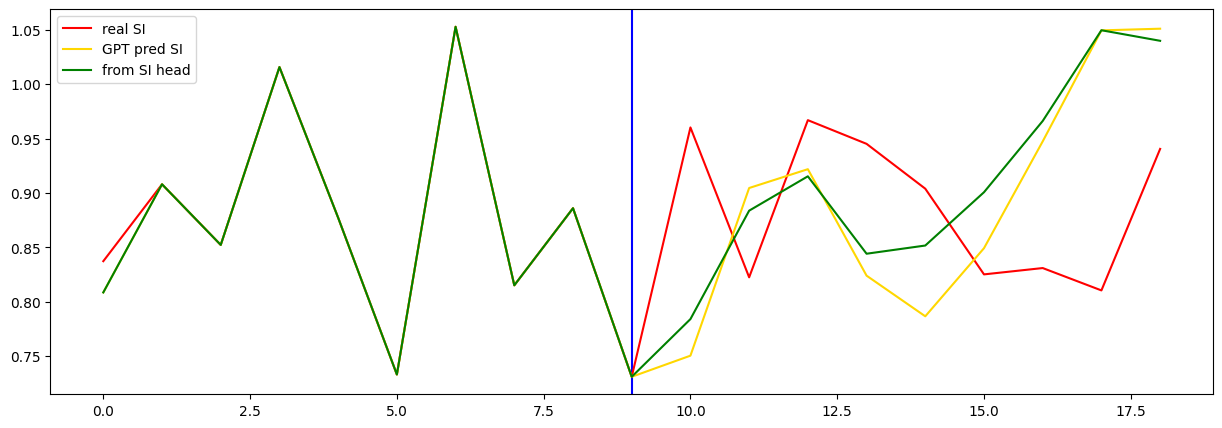

Testing R**2 - (all) - (no inputs):  0.9639520735351285
Testing R**2 - (f2) - SI full (no inputs):  -2.0109352445485302
0 ...index R**2 (no inputs):  -0.2305079839931261
1 ...index R**2 (no inputs):  -1.0180448521432663
2 ...index R**2 (no inputs):  -2.0109352445485302
3 ...index R**2 (no inputs):  -8.733134375145978
4 ...index R**2 (no inputs):  -1.5217989942328791
5 ...index R**2 (no inputs):  -30.479461979718636
6 ...index R**2 (no inputs):  -8.839560652824874
7 ...index R**2 (no inputs):  -3.493339010386454
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.501646955433543
10 ...index R**2 (no inputs):  -0.7499722604944503
11 ...index R**2 (no inputs):  -235.95316323798087
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.557247296500514
16 ...index R**2 (no inputs):  -0.7042061750125617
17 ...index R**2 (no inputs):  -85.32169229189554
18 ...index R**2 (no inputs):  -0.97557766

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 1.049806
Loss_SI: 1.01138436794281 Loss_all: 1.3956048488616943
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.481581
Loss_SI: 0.44071364402770996 Loss_all: 0.8493860363960266
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.126720
Loss_SI: 0.06169239431619644 Loss_all: 0.7119713425636292
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.087805
Loss_SI: 0.033402152359485626 Loss_all: 0.5774329304695129
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.089851
Loss_SI: 0.02256668172776699 Loss_all: 0.6954056620597839
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.060612
Loss_SI: 0.022875886410474777 Loss_all: 0.40023893117904663
Prediction shape: torch.Size([32, 35])
===


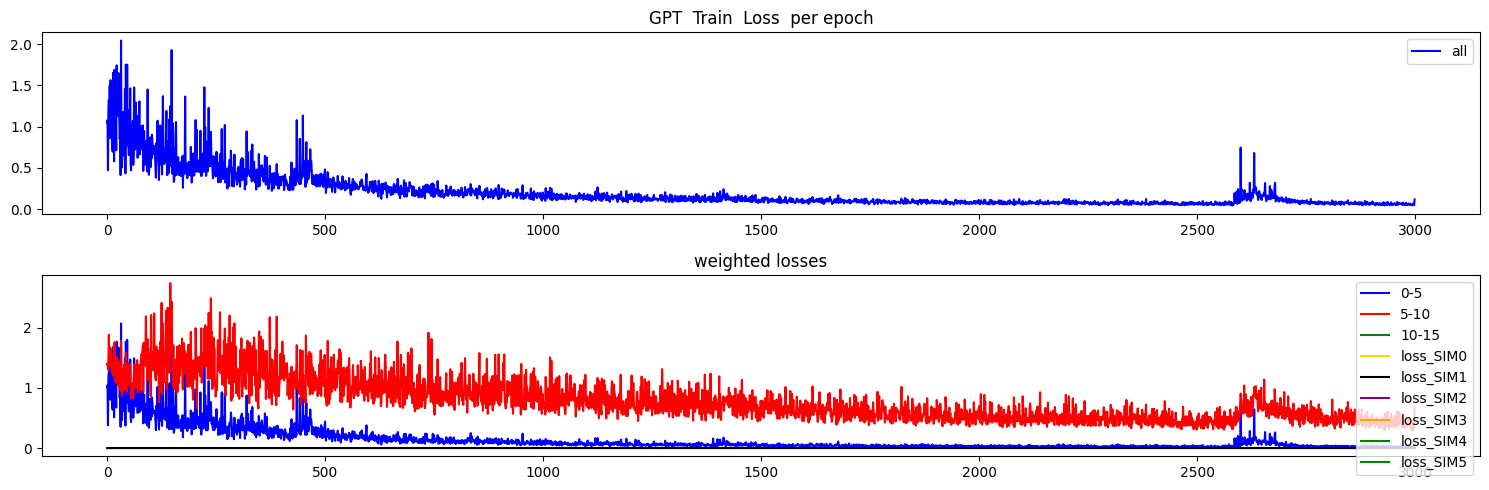

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


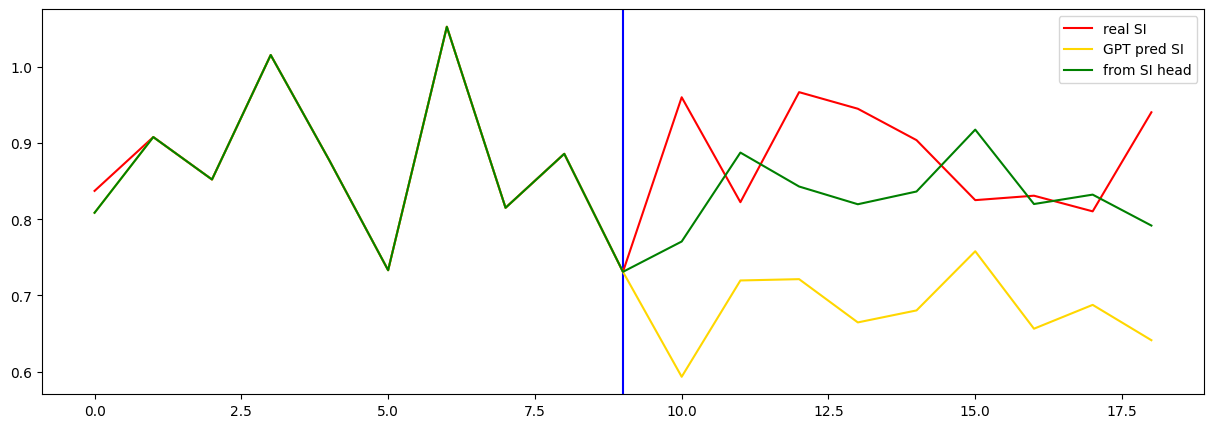

Testing R**2 - (all) - (no inputs):  0.9773094386141424
Testing R**2 - (f2) - SI full (no inputs):  -10.942483337679645
0 ...index R**2 (no inputs):  0.1405638558137754
1 ...index R**2 (no inputs):  -1.6725491901348888
2 ...index R**2 (no inputs):  -10.942483337679645
3 ...index R**2 (no inputs):  -29.157320739335567
4 ...index R**2 (no inputs):  -15.41725627892508
5 ...index R**2 (no inputs):  -18.772724563497302
6 ...index R**2 (no inputs):  -29.95883032739311
7 ...index R**2 (no inputs):  -4.581144123184958
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2758453609446463
10 ...index R**2 (no inputs):  -0.3510372497335035
11 ...index R**2 (no inputs):  -126.95096584659633
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.410182798183417
16 ...index R**2 (no inputs):  -0.6932682993072257
17 ...index R**2 (no inputs):  -64.13009573618571
18 ...index R**2 (no inputs):  -1.0598832

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.084976
Loss_SI: 1.0752055644989014 Loss_all: 1.1729081869125366
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.645910
Loss_SI: 0.6392271518707275 Loss_all: 0.7060537338256836
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.300619
Loss_SI: 0.2529059052467346 Loss_all: 0.7300329208374023
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.212045
Loss_SI: 0.15436822175979614 Loss_all: 0.7311336398124695
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.176381
Loss_SI: 0.09789282828569412 Loss_all: 0.8827753663063049
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.132709
Loss_SI: 0.061456963419914246 Loss_all: 0.7739740014076233
Prediction shape: torch.Size([32, 35])
===


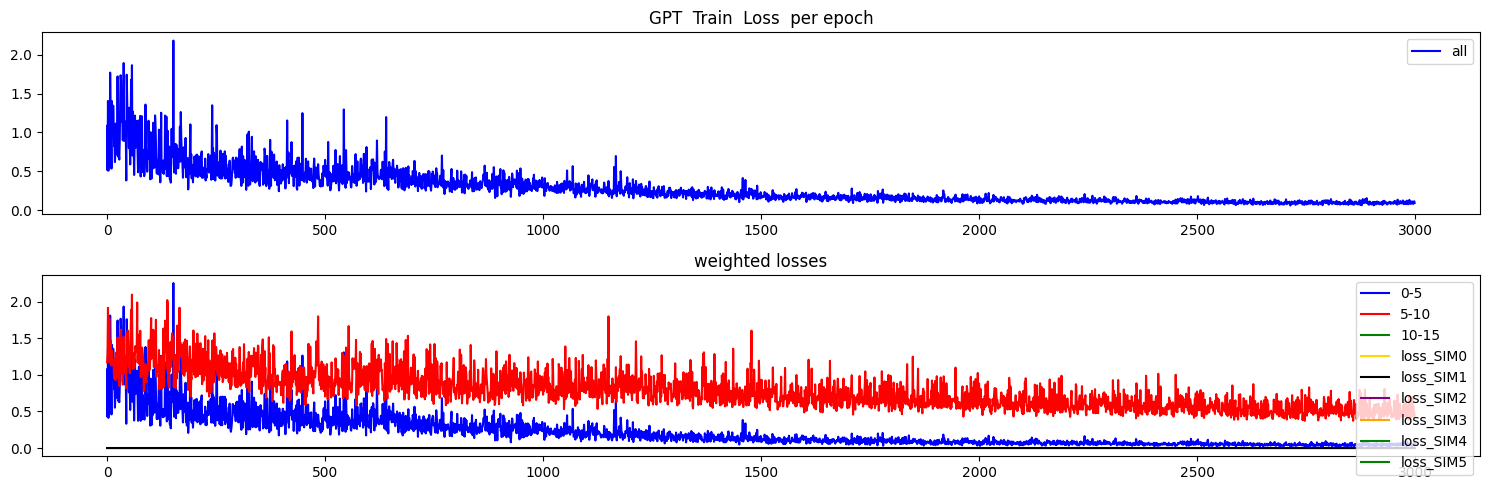

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


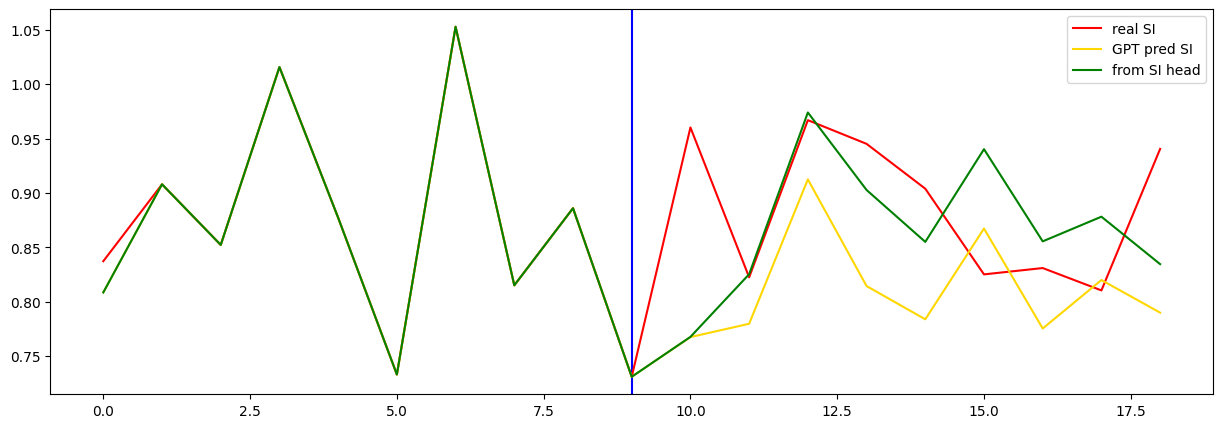

Testing R**2 - (all) - (no inputs):  0.99348669982224
Testing R**2 - (f2) - SI full (no inputs):  -1.179452804022664
0 ...index R**2 (no inputs):  -0.04755518932183156
1 ...index R**2 (no inputs):  -1.4602168853811186
2 ...index R**2 (no inputs):  -1.179452804022664
3 ...index R**2 (no inputs):  -343.5033420012833
4 ...index R**2 (no inputs):  -3.444884920729968
5 ...index R**2 (no inputs):  -4.627912563781335
6 ...index R**2 (no inputs):  -1.8869855649813365
7 ...index R**2 (no inputs):  -3.680898814633161
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.04463591676591805
10 ...index R**2 (no inputs):  -0.13090060352485344
11 ...index R**2 (no inputs):  -801.6622182421114
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4398344489301564
16 ...index R**2 (no inputs):  -0.19314983583792844
17 ...index R**2 (no inputs):  -136.72015557289123
18 ...index R**2 (no inputs):  -1.42046893

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


[0] Train Loss: 1.089711
Loss_SI: 1.0614335536956787 Loss_all: 1.3442093133926392
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.460785
Loss_SI: 0.3853461742401123 Loss_all: 1.1397327184677124
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.252434
Loss_SI: 0.1896761953830719 Loss_all: 0.8172581791877747
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.191403
Loss_SI: 0.1302812695503235 Loss_all: 0.7414975166320801
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.203907
Loss_SI: 0.11297880858182907 Loss_all: 1.0222580432891846
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.344681
Loss_SI: 0.2853797674179077 Loss_all: 0.8783897161483765
Prediction shape: torch.Size([32, 35])
===


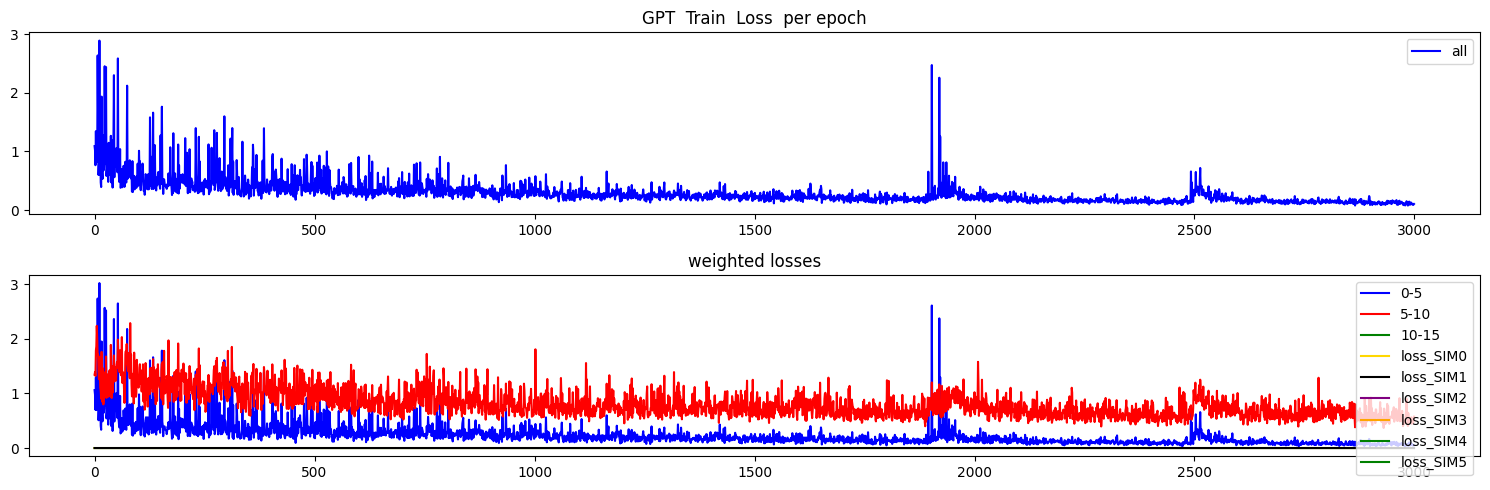

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


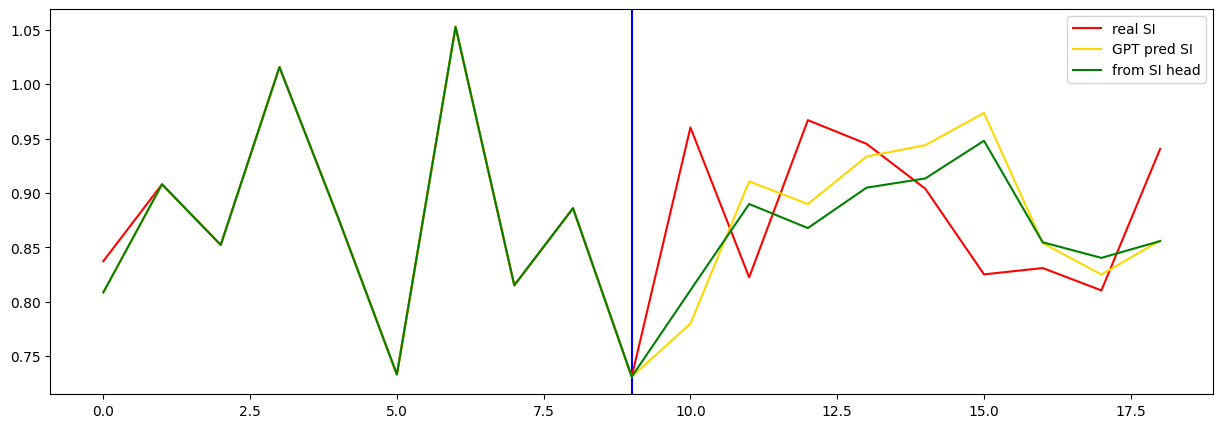

Testing R**2 - (all) - (no inputs):  0.9967934188631487
Testing R**2 - (f2) - SI full (no inputs):  -0.8852624730058802
0 ...index R**2 (no inputs):  -0.4157688033352984
1 ...index R**2 (no inputs):  -0.3022929541671884
2 ...index R**2 (no inputs):  -0.8852624730058802
3 ...index R**2 (no inputs):  -32.06279140132095
4 ...index R**2 (no inputs):  -95.07847130169354
5 ...index R**2 (no inputs):  -1.7392644693025106
6 ...index R**2 (no inputs):  -10.298571743439716
7 ...index R**2 (no inputs):  0.0009497375173347367
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.059429464650859964
10 ...index R**2 (no inputs):  -0.10517711664401763
11 ...index R**2 (no inputs):  -370.7919451149907
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9227082543934886
16 ...index R**2 (no inputs):  -0.1581737434914665
17 ...index R**2 (no inputs):  -149.99703216552734
18 ...index R**2 (no inputs):  -0.

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



## Run 3


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.683271
Loss_SI: 1.7145459651947021 Loss_all: 1.4017943143844604
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.130692
Loss_SI: 0.04386128857731819 Loss_all: 0.9121700525283813
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.052591
Loss_SI: 0.014517243020236492 Loss_all: 0.3952508270740509
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.039171
Loss_SI: 0.015179703943431377 Loss_all: 0.2550947070121765
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.037592
Loss_SI: 0.007323777303099632 Loss_all: 0.3100067675113678
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.028814
Loss_SI: 0.010543922893702984 Loss_all: 0.19324126839637756
Prediction shape: torch.Size([32, 35])
===


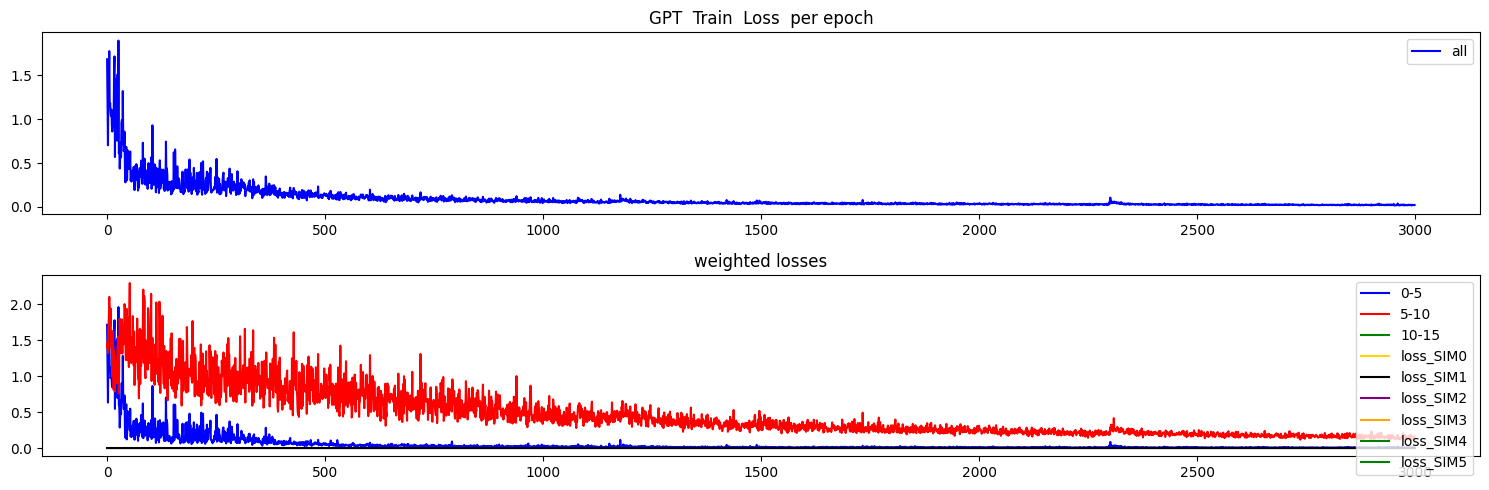

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


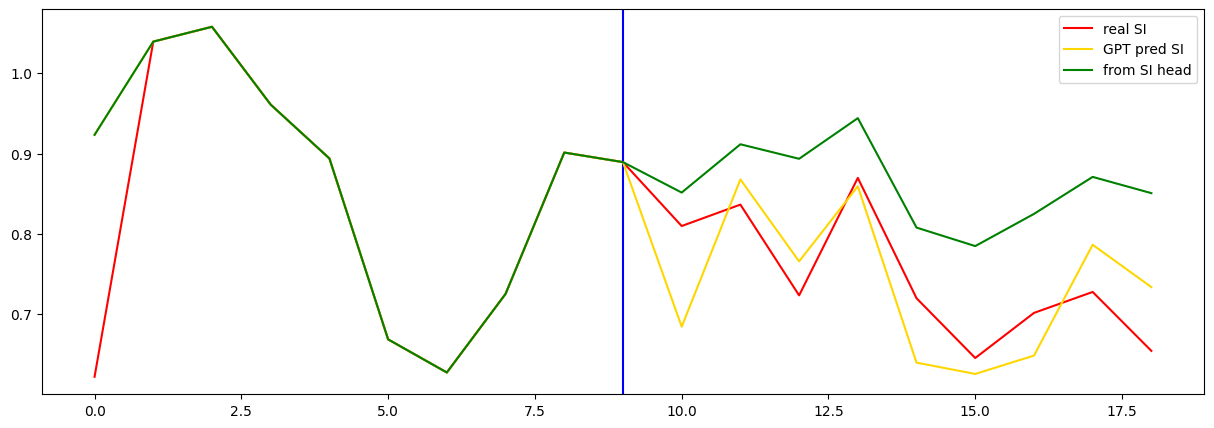

Testing R**2 - (all) - (no inputs):  0.996307366714129
Testing R**2 - (f2) - SI full (no inputs):  -1.082186189290106
0 ...index R**2 (no inputs):  -3.869720698007593
1 ...index R**2 (no inputs):  -9.474307849246788
2 ...index R**2 (no inputs):  -1.082186189290106
3 ...index R**2 (no inputs):  -2.396311075399545
4 ...index R**2 (no inputs):  -7.07654808101417
5 ...index R**2 (no inputs):  -0.10294137309679474
6 ...index R**2 (no inputs):  -15.945287442322392
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6407885785506446
10 ...index R**2 (no inputs):  -1.370806015380241
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7173914406095281
16 ...index R**2 (no inputs):  -0.15776572083326035
17 ...index R**2 (no inputs):  -16.292418003082275
18 ...index R**2 (no inputs):  -10.377398456968637
19 ...index R**2 (no inp

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.583899
Loss_SI: 0.5415464043617249 Loss_all: 0.9650701284408569
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.273197
Loss_SI: 0.2038717120885849 Loss_all: 0.8971211910247803
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.139529
Loss_SI: 0.09447470307350159 Loss_all: 0.5450156331062317
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.111722
Loss_SI: 0.03688318282365799 Loss_all: 0.7852678298950195
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.073154
Loss_SI: 0.022199973464012146 Loss_all: 0.5317431092262268
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.049689
Loss_SI: 0.010652212426066399 Loss_all: 0.40102025866508484
Prediction shape: torch.Size([32, 35])
===


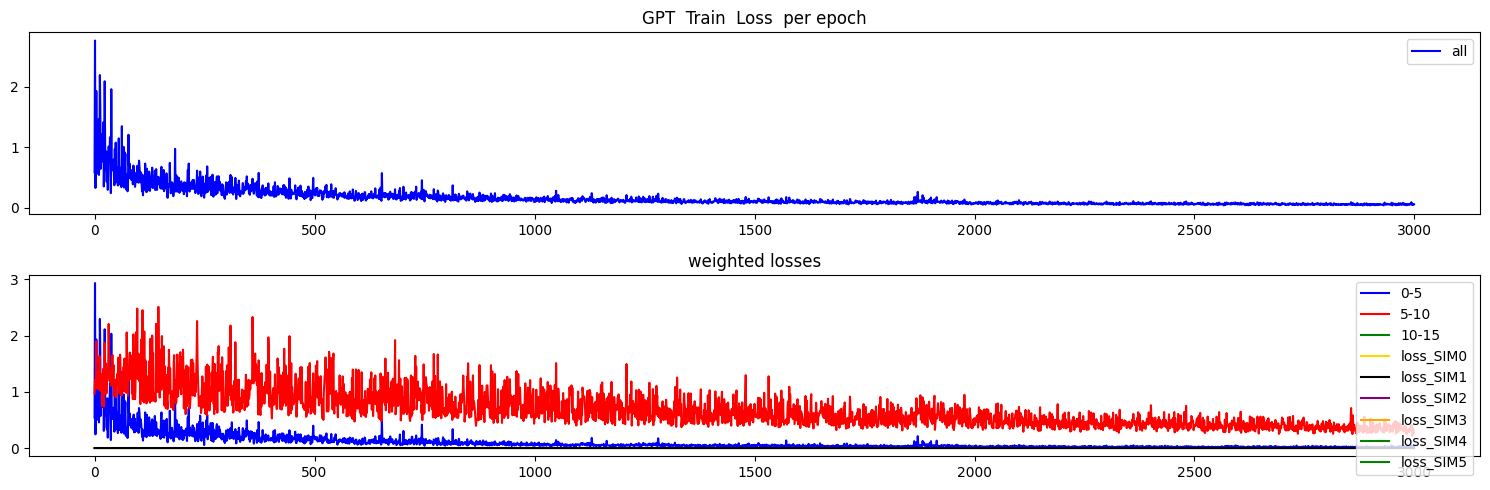

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


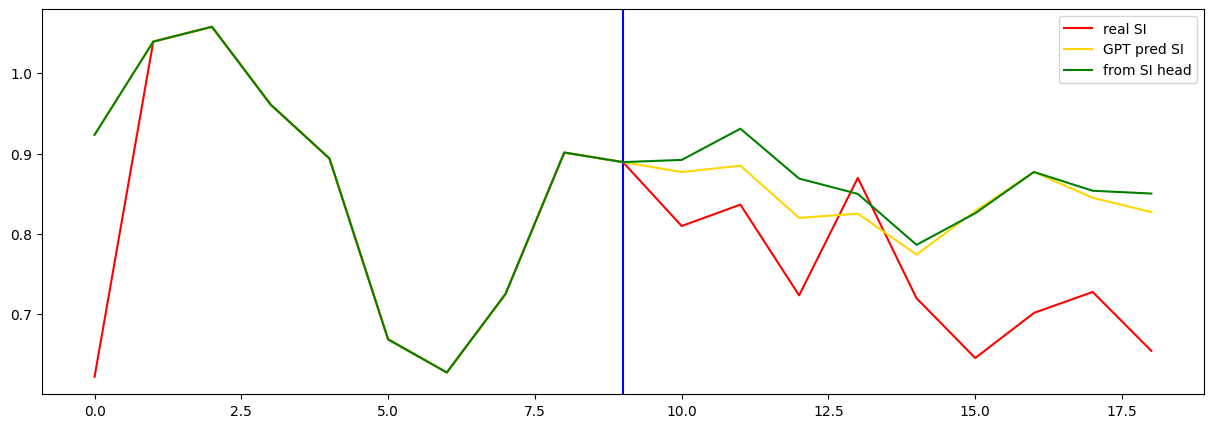

Testing R**2 - (all) - (no inputs):  0.9952576251335504
Testing R**2 - (f2) - SI full (no inputs):  -2.1302452688272835
0 ...index R**2 (no inputs):  -4.086726902033988
1 ...index R**2 (no inputs):  -1.0065804038998079
2 ...index R**2 (no inputs):  -2.1302452688272835
3 ...index R**2 (no inputs):  -3.649672886492339
4 ...index R**2 (no inputs):  -5.107164995910602
5 ...index R**2 (no inputs):  -0.4183284137683829
6 ...index R**2 (no inputs):  -12.573131424960987
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07157965241352904
10 ...index R**2 (no inputs):  -0.15723647921883455
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8429914503885947
16 ...index R**2 (no inputs):  0.051059106448276825
17 ...index R**2 (no inputs):  -17.450540991624198
18 ...index R**2 (no inputs):  -28.91977657371685
19 ...index R**2 (

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.447791
Loss_SI: 0.3947174549102783 Loss_all: 0.9254537224769592
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.176412
Loss_SI: 0.11614890396595001 Loss_all: 0.7187845706939697
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.133702
Loss_SI: 0.07586434483528137 Loss_all: 0.6542443633079529
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.100524
Loss_SI: 0.04954051598906517 Loss_all: 0.5593712329864502
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.058073
Loss_SI: 0.022322017699480057 Loss_all: 0.37983378767967224
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.064072
Loss_SI: 0.029177309945225716 Loss_all: 0.3781225085258484
Prediction shape: torch.Size([32, 35])
===


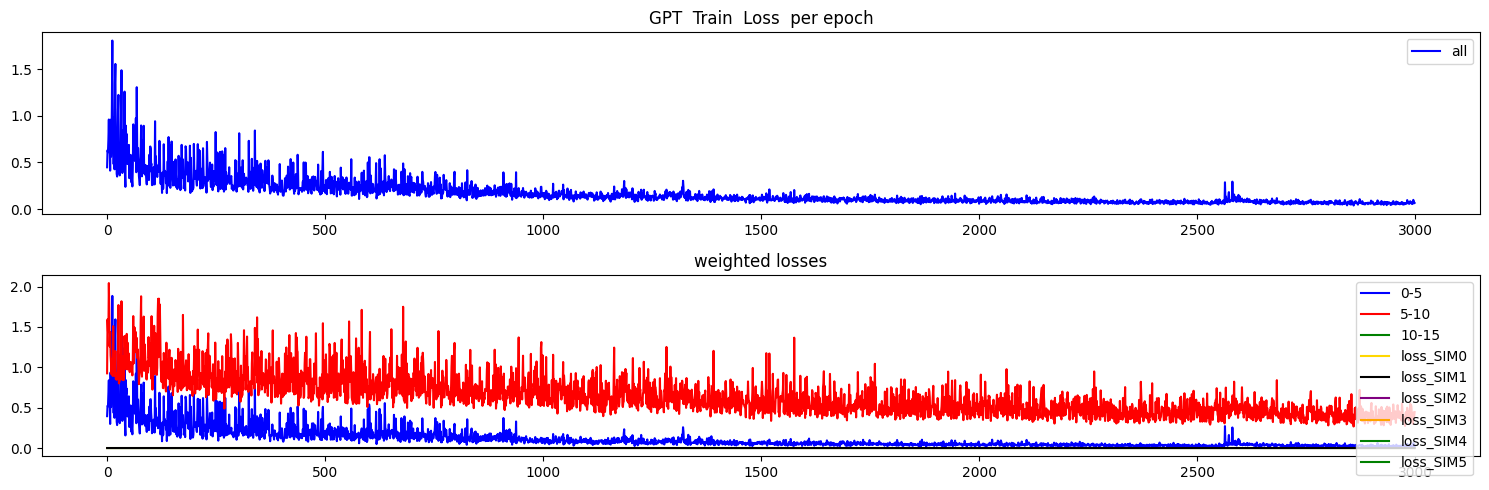

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


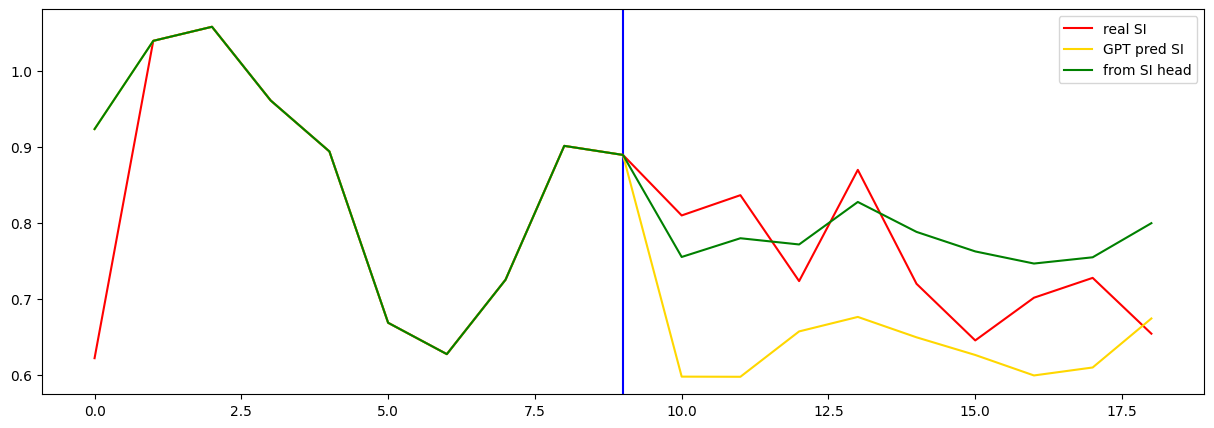

Testing R**2 - (all) - (no inputs):  0.9883645716500928
Testing R**2 - (f2) - SI full (no inputs):  -1.628009301337562
0 ...index R**2 (no inputs):  -1.7519992400775606
1 ...index R**2 (no inputs):  -3.432239436897162
2 ...index R**2 (no inputs):  -1.628009301337562
3 ...index R**2 (no inputs):  -12.152953401976895
4 ...index R**2 (no inputs):  -64.34879010035007
5 ...index R**2 (no inputs):  -2.481771184232252
6 ...index R**2 (no inputs):  -1179.2907433400107
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.40738888184686006
10 ...index R**2 (no inputs):  -0.1509685928096709
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.24912145330151758
16 ...index R**2 (no inputs):  -1.3365402151261527
17 ...index R**2 (no inputs):  -370.04671433766686
18 ...index R**2 (no inputs):  -14.952468412177973
19 ...index R**2 (no

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.530401
Loss_SI: 0.4632450342178345 Loss_all: 1.1348090171813965
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.547127
Loss_SI: 0.46847793459892273 Loss_all: 1.2549645900726318
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.248762
Loss_SI: 0.18441136181354523 Loss_all: 0.8279168605804443
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.213060
Loss_SI: 0.1551593542098999 Loss_all: 0.7341625690460205
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.154076
Loss_SI: 0.09268230199813843 Loss_all: 0.7066189646720886
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102089
Loss_SI: 0.06193199008703232 Loss_all: 0.4635063707828522
Prediction shape: torch.Size([32, 35])
===


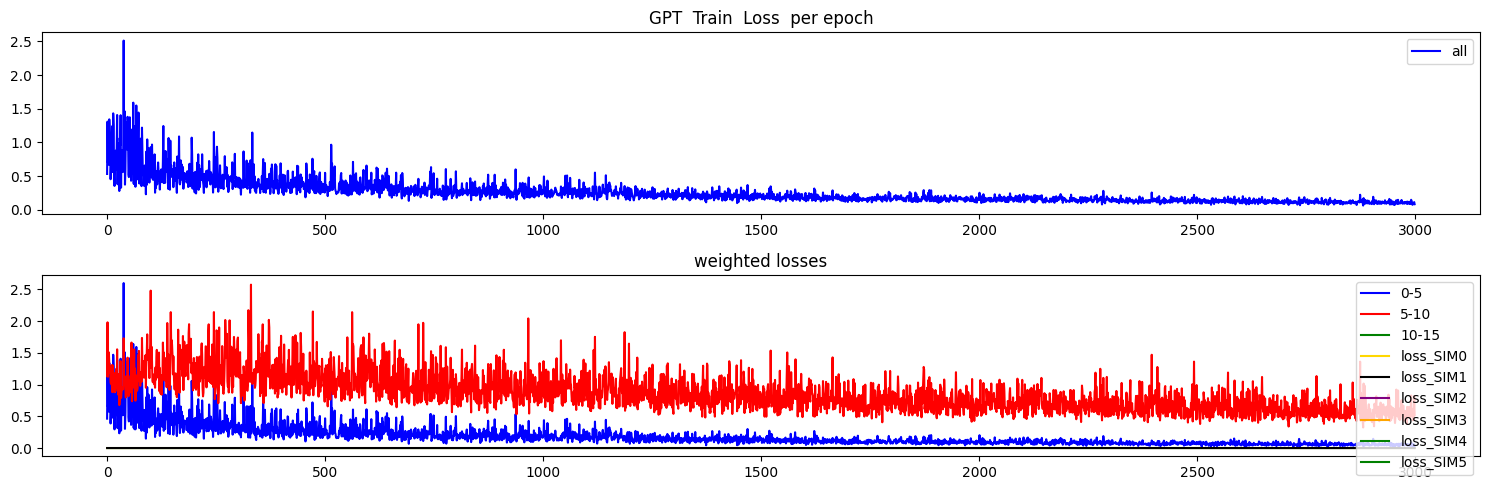

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


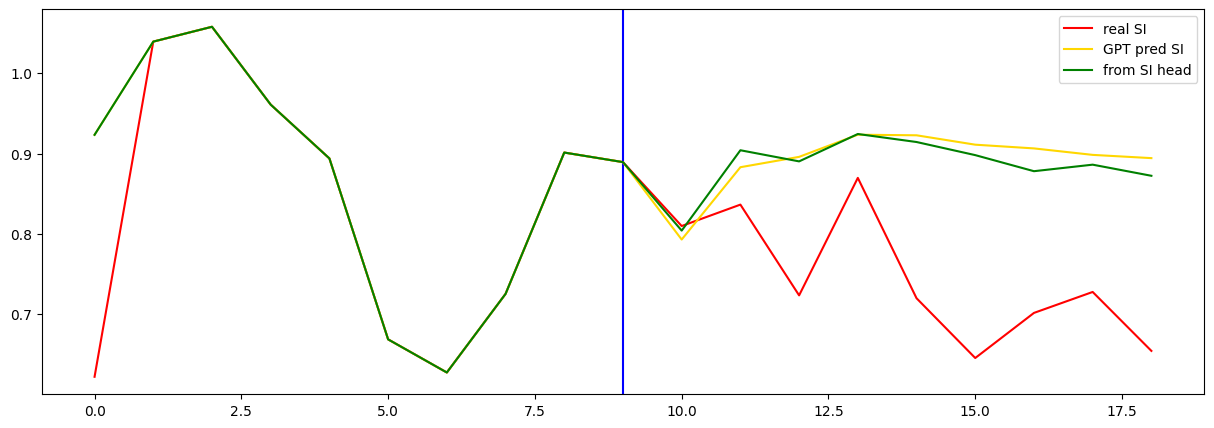

Testing R**2 - (all) - (no inputs):  0.9948454217470657
Testing R**2 - (f2) - SI full (no inputs):  -5.378136277050363
0 ...index R**2 (no inputs):  -0.5305388711310703
1 ...index R**2 (no inputs):  -0.26384322835947693
2 ...index R**2 (no inputs):  -5.378136277050363
3 ...index R**2 (no inputs):  -102.34741958638755
4 ...index R**2 (no inputs):  -83.9018897207305
5 ...index R**2 (no inputs):  -0.5139312285420174
6 ...index R**2 (no inputs):  -43.941850971476974
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.018967416254628056
10 ...index R**2 (no inputs):  -0.22704003893355096
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.143340577711012
16 ...index R**2 (no inputs):  -5.833855045911888
17 ...index R**2 (no inputs):  -1271.2254943847656
18 ...index R**2 (no inputs):  -14.52962312993017
19 ...index R**2 (no

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



## Run 4


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.110441
Loss_SI: 1.096742033958435 Loss_all: 1.2337368726730347
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.157016
Loss_SI: 0.07934468984603882 Loss_all: 0.8560581803321838
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.065916
Loss_SI: 0.01675604283809662 Loss_all: 0.5083513855934143
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.038482
Loss_SI: 0.01414254680275917 Loss_all: 0.2575325667858124
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.032497
Loss_SI: 0.0113731250166893 Loss_all: 0.22261328995227814
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.026042
Loss_SI: 0.009683338925242424 Loss_all: 0.17327181994915009
Prediction shape: torch.Size([32, 35])
===


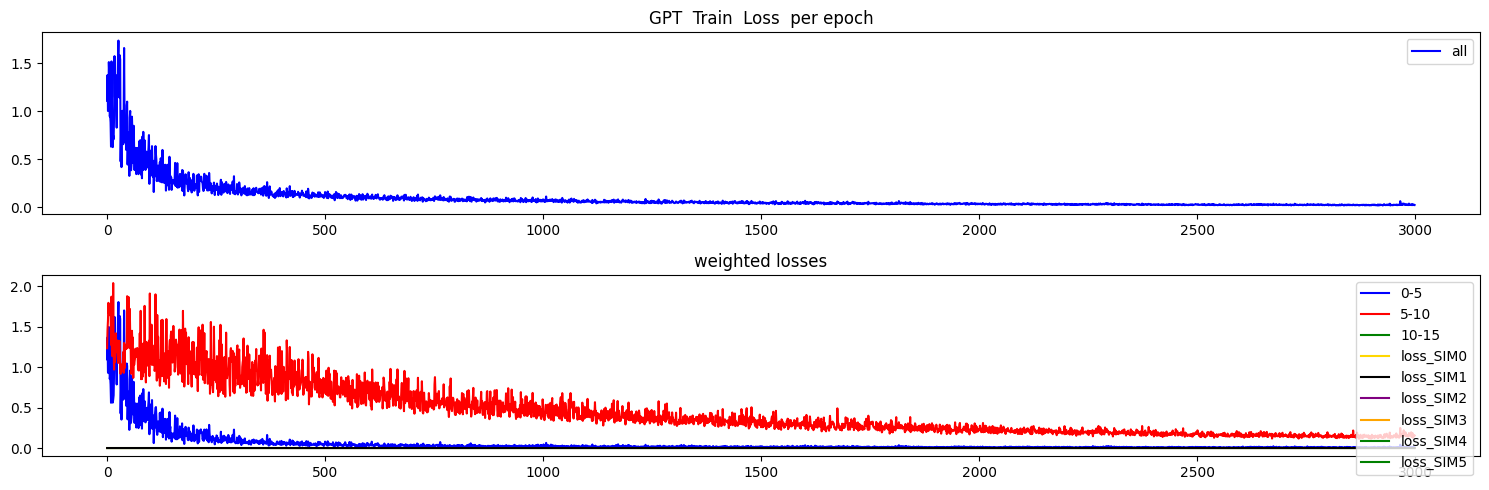

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


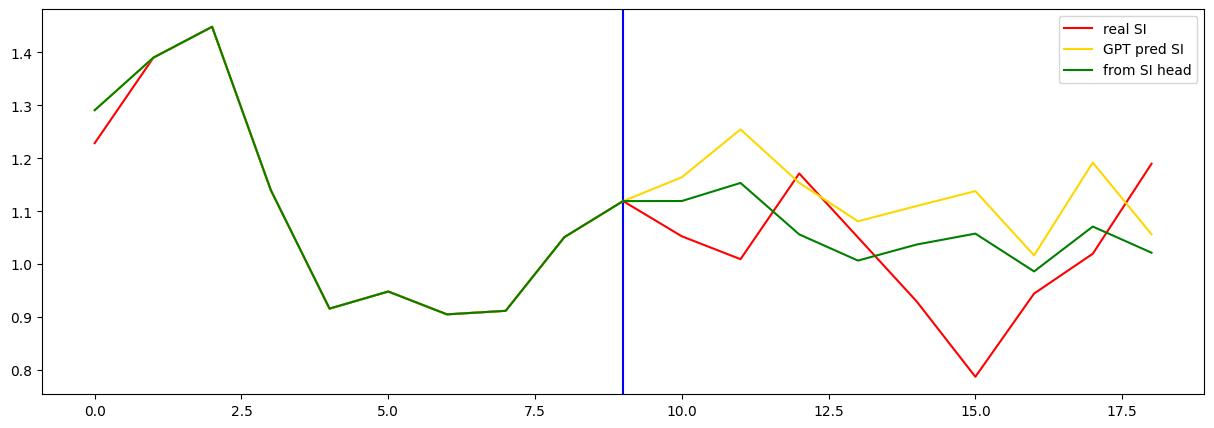

Testing R**2 - (all) - (no inputs):  0.9851269023578213
Testing R**2 - (f2) - SI full (no inputs):  -0.45646803285510384
0 ...index R**2 (no inputs):  0.2775113101927146
1 ...index R**2 (no inputs):  -5.287674220722658
2 ...index R**2 (no inputs):  -0.45646803285510384
3 ...index R**2 (no inputs):  -269.8466597713589
4 ...index R**2 (no inputs):  -5.860746907556446
5 ...index R**2 (no inputs):  -9.582581424750035
6 ...index R**2 (no inputs):  -256.85471257021254
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22678736737742744
10 ...index R**2 (no inputs):  -0.7822033404904973
11 ...index R**2 (no inputs):  -23.246413107595394
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3828114279688746
16 ...index R**2 (no inputs):  -0.2932146509287774
17 ...index R**2 (no inputs):  -3.5001334599277767
18 ...index R**2 (no inputs):  -1.845748422881028
19 .

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 1.493999
Loss_SI: 1.518283724784851 Loss_all: 1.2754396200180054
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.372209
Loss_SI: 0.2921649217605591 Loss_all: 1.092604637145996
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.115537
Loss_SI: 0.05907529592514038 Loss_all: 0.6236923336982727
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.106358
Loss_SI: 0.0421721450984478 Loss_all: 0.6840294599533081
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.086795
Loss_SI: 0.021015994250774384 Loss_all: 0.6788081526756287
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.072947
Loss_SI: 0.02453477680683136 Loss_all: 0.5086542367935181
Prediction shape: torch.Size([32, 35])
===


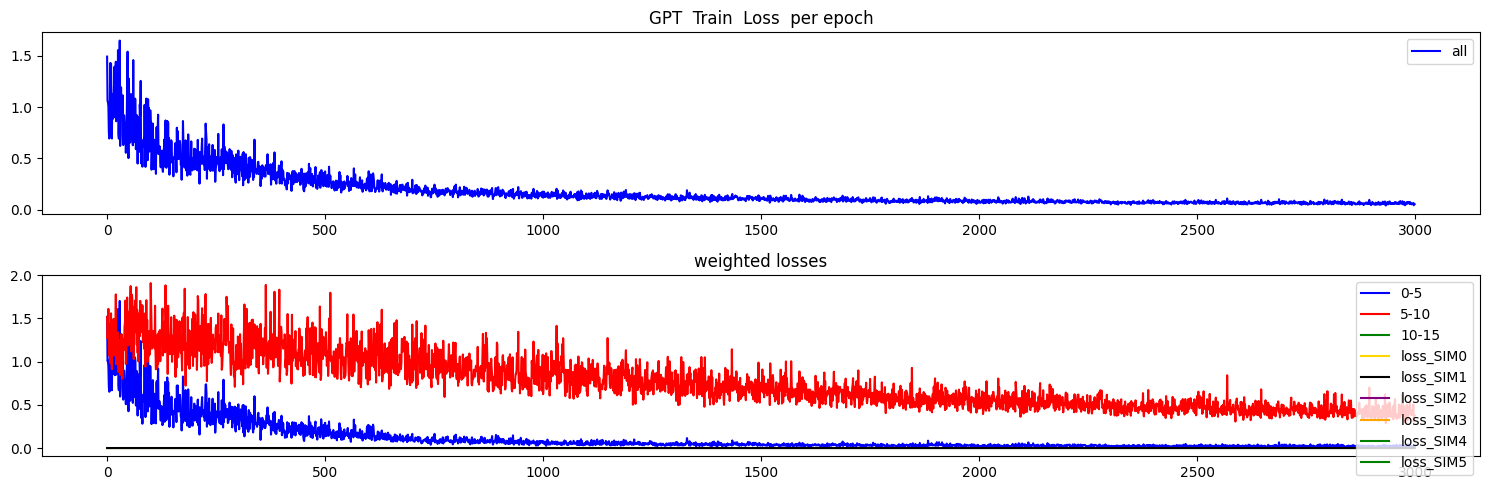

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


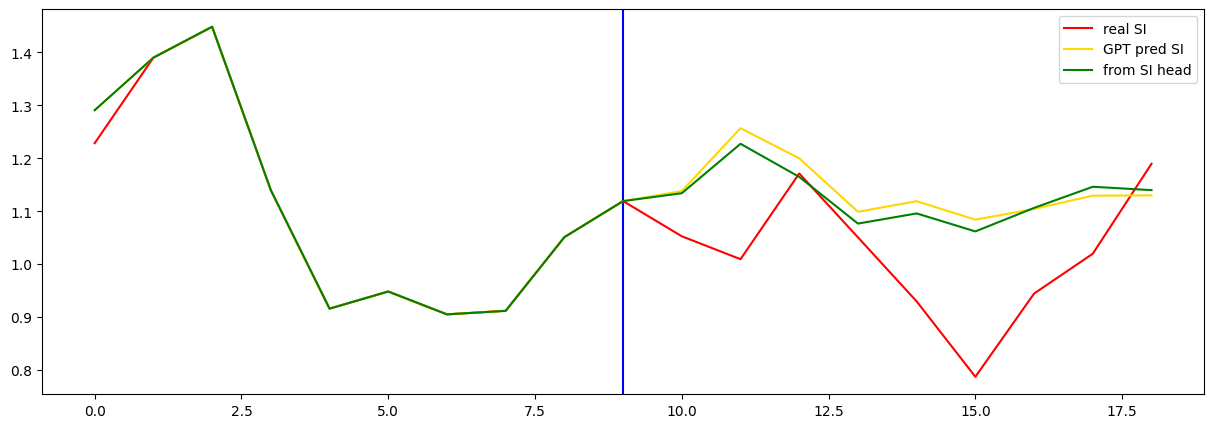

Testing R**2 - (all) - (no inputs):  0.9471959824871569
Testing R**2 - (f2) - SI full (no inputs):  -0.3904207487265936
0 ...index R**2 (no inputs):  -0.29207712279211795
1 ...index R**2 (no inputs):  -2.2426303422234395
2 ...index R**2 (no inputs):  -0.3904207487265936
3 ...index R**2 (no inputs):  -588.5691807268958
4 ...index R**2 (no inputs):  -2.4134823822066243
5 ...index R**2 (no inputs):  -38.82636603595882
6 ...index R**2 (no inputs):  -2067.3918096858743
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.06493673159606361
10 ...index R**2 (no inputs):  -1.6233684937666562
11 ...index R**2 (no inputs):  -9.201559170030741
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4503822924680887
16 ...index R**2 (no inputs):  0.12620032899664113
17 ...index R**2 (no inputs):  -86.22474395753393
18 ...index R**2 (no inputs):  -0.02437550315446413
19 

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.980569
Loss_SI: 0.9816741943359375 Loss_all: 0.9706178903579712
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.568548
Loss_SI: 0.5023128986358643 Loss_all: 1.164668083190918
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.242036
Loss_SI: 0.15079814195632935 Loss_all: 1.063178539276123
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.169074
Loss_SI: 0.09777303040027618 Loss_all: 0.8107784986495972
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.153883
Loss_SI: 0.09524068236351013 Loss_all: 0.6816594004631042
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.082283
Loss_SI: 0.03842681646347046 Loss_all: 0.4769842028617859
Prediction shape: torch.Size([32, 35])
===


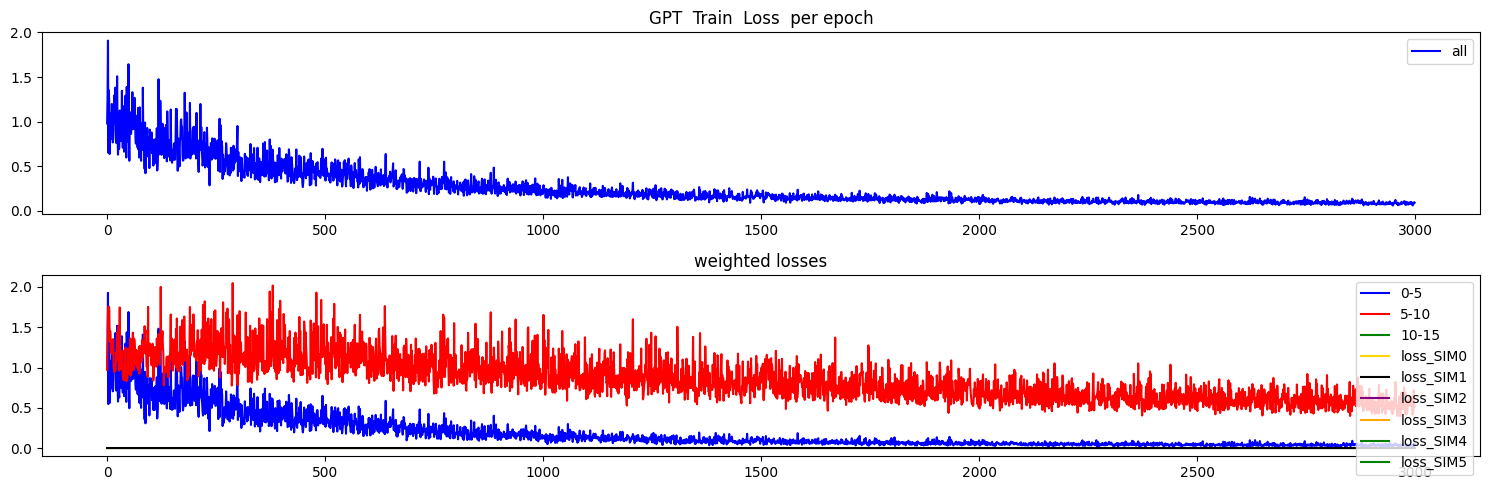

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


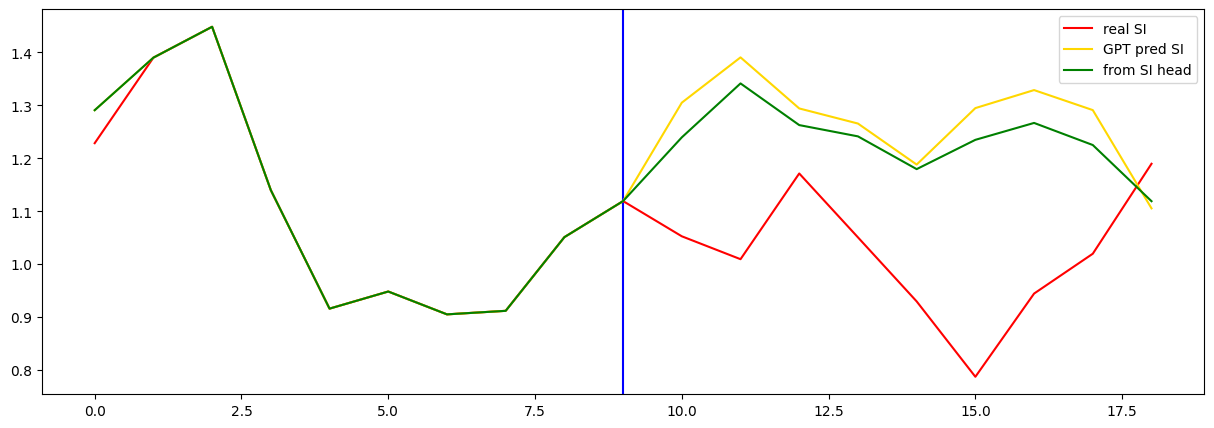

Testing R**2 - (all) - (no inputs):  0.9075702862116876
Testing R**2 - (f2) - SI full (no inputs):  -3.4034995971130755
0 ...index R**2 (no inputs):  0.37270325131754534
1 ...index R**2 (no inputs):  -3.7885802138236198
2 ...index R**2 (no inputs):  -3.4034995971130755
3 ...index R**2 (no inputs):  -1428.7217379254137
4 ...index R**2 (no inputs):  -19.439305835912016
5 ...index R**2 (no inputs):  -68.98873892033467
6 ...index R**2 (no inputs):  -290.46592007504853
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.382016813040986
10 ...index R**2 (no inputs):  -1.2215219931768369
11 ...index R**2 (no inputs):  -72.7047284311124
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2002358843522924
16 ...index R**2 (no inputs):  -1.3385929295792347
17 ...index R**2 (no inputs):  -3935.1022269161126
18 ...index R**2 (no inputs):  -1.683634277249089
19 ...

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.062540
Loss_SI: 1.0666847229003906 Loss_all: 1.0252374410629272
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.610305
Loss_SI: 0.5554848909378052 Loss_all: 1.1036858558654785
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.306597
Loss_SI: 0.22225311398506165 Loss_all: 1.0656895637512207
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.262913
Loss_SI: 0.20662617683410645 Loss_all: 0.7694946527481079
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.214885
Loss_SI: 0.1487351953983307 Loss_all: 0.8102332949638367
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.152109
Loss_SI: 0.06892817467451096 Loss_all: 0.9007401466369629
Prediction shape: torch.Size([32, 35])
===


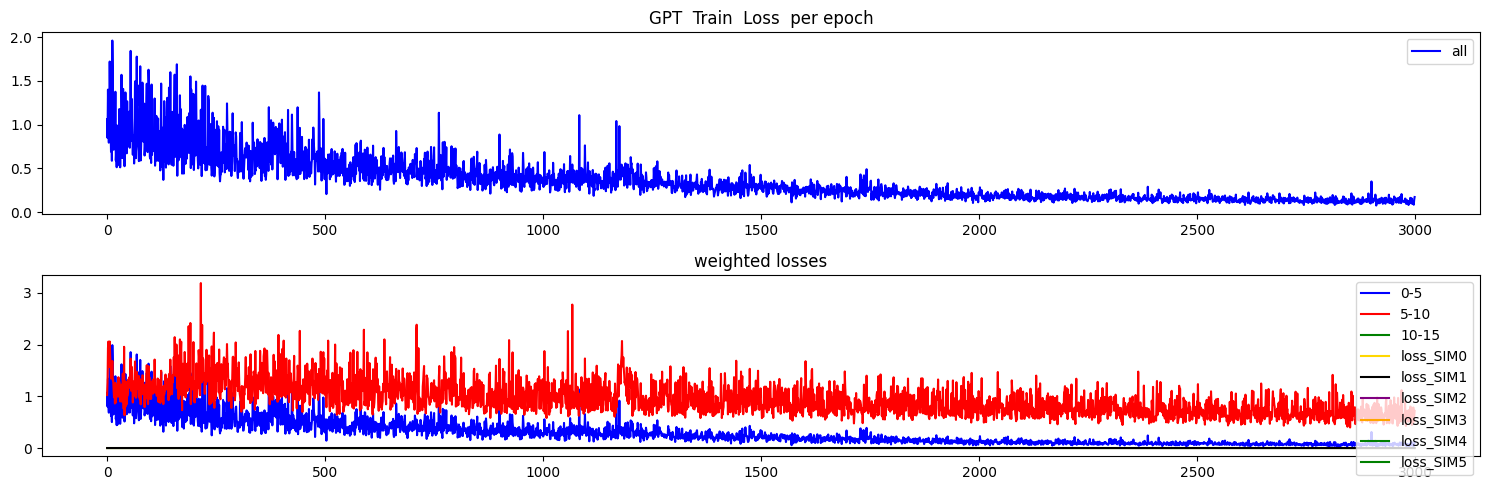

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


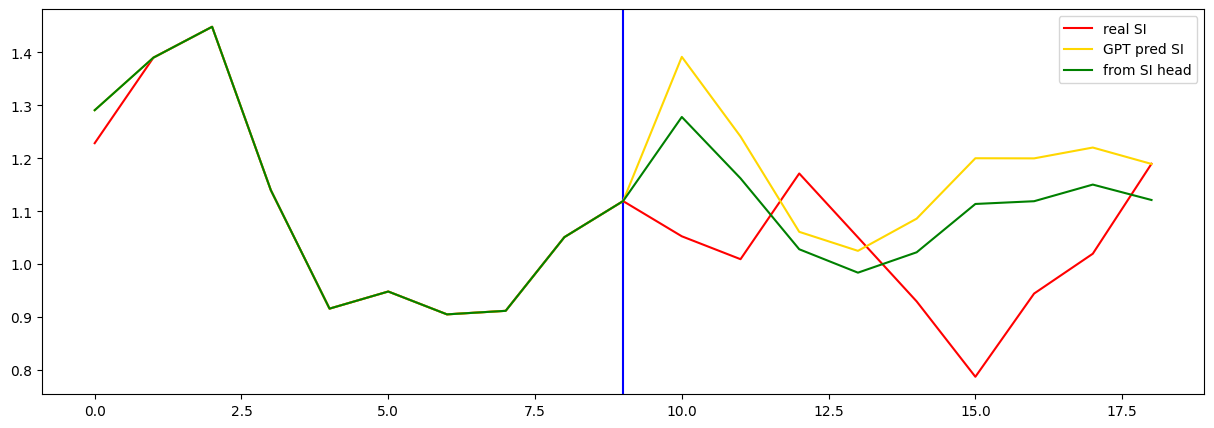

Testing R**2 - (all) - (no inputs):  0.9284480441955298
Testing R**2 - (f2) - SI full (no inputs):  -1.1623882657961646
0 ...index R**2 (no inputs):  0.30378750205218785
1 ...index R**2 (no inputs):  -1.70112106988232
2 ...index R**2 (no inputs):  -1.1623882657961646
3 ...index R**2 (no inputs):  -2723.7767328676946
4 ...index R**2 (no inputs):  -3.835973255674694
5 ...index R**2 (no inputs):  -53.22662437420882
6 ...index R**2 (no inputs):  -350.5050062571312
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04575326316024442
10 ...index R**2 (no inputs):  0.3557895561059975
11 ...index R**2 (no inputs):  -206.7239335196193
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1831571542483363
16 ...index R**2 (no inputs):  -0.7782656633225478
17 ...index R**2 (no inputs):  -876.2271709441129
18 ...index R**2 (no inputs):  -6.392032848579903
19 ...ind

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



## Run 5


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.846300
Loss_SI: 0.7672105431556702 Loss_all: 1.558106780052185
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.144333
Loss_SI: 0.07902061939239502 Loss_all: 0.7321418523788452
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.068150
Loss_SI: 0.013453914783895016 Loss_all: 0.5604127049446106
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.036606
Loss_SI: 0.007565951440483332 Loss_all: 0.29796573519706726
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.034695
Loss_SI: 0.008436918258666992 Loss_all: 0.27101925015449524
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.032371
Loss_SI: 0.014042329974472523 Loss_all: 0.19732633233070374
Prediction shape: torch.Size([32, 35])
===


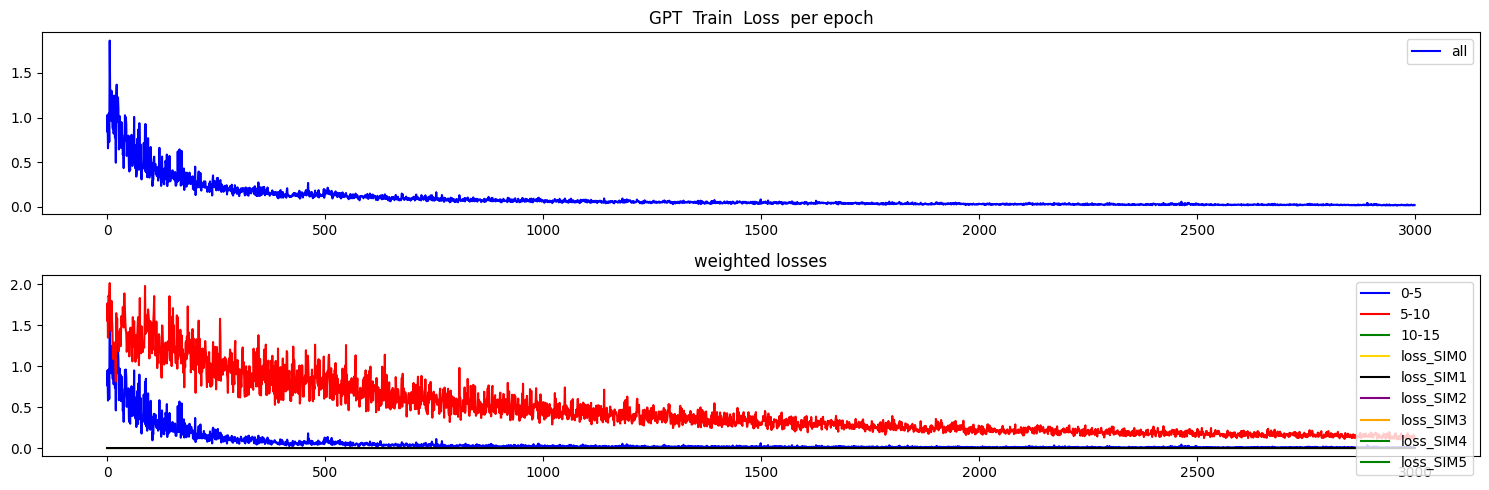

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


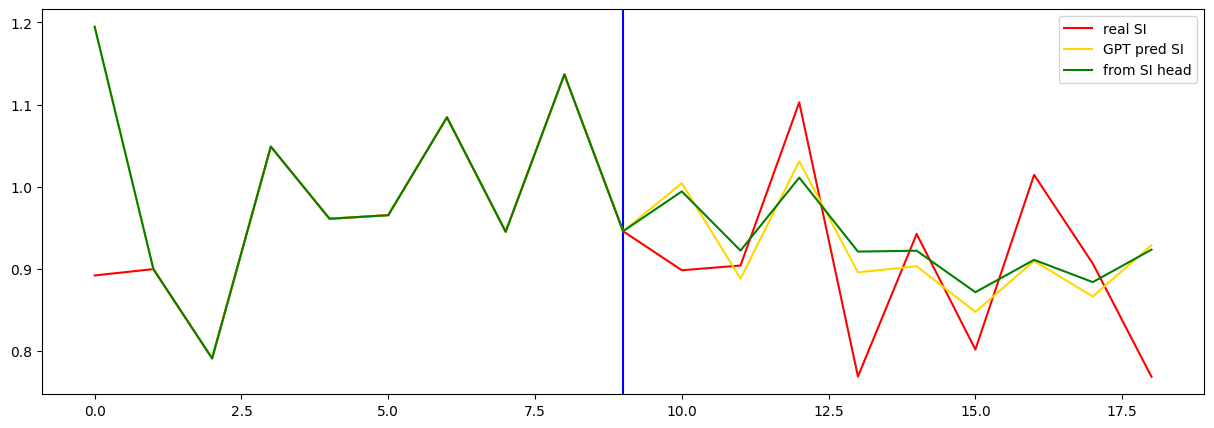

Testing R**2 - (all) - (no inputs):  0.9989198293984964
Testing R**2 - (f2) - SI full (no inputs):  -0.7567486479509076
0 ...index R**2 (no inputs):  -0.6876296983734418
1 ...index R**2 (no inputs):  0.0230795027896874
2 ...index R**2 (no inputs):  -0.7567486479509076
3 ...index R**2 (no inputs):  -444.08197144295303
4 ...index R**2 (no inputs):  -15.71244665191389
5 ...index R**2 (no inputs):  -2.4694403241144673
6 ...index R**2 (no inputs):  -43.264876314109614
7 ...index R**2 (no inputs):  -5934.972088030342
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4052909132007929
10 ...index R**2 (no inputs):  -0.5543626984967369
11 ...index R**2 (no inputs):  -26.753150593536358
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.015863770377329
16 ...index R**2 (no inputs):  -0.09352423595194281
17 ...index R**2 (no inputs):  -17.781707079500364
18 ...index R**2 (no inputs):  -1.49330

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.675986
Loss_SI: 0.6131471395492554 Loss_all: 1.2415332794189453
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.388357
Loss_SI: 0.30937454104423523 Loss_all: 1.0992034673690796
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.144044
Loss_SI: 0.07974296808242798 Loss_all: 0.72275710105896
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.107781
Loss_SI: 0.05356736108660698 Loss_all: 0.5957082509994507
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.064388
Loss_SI: 0.02055131271481514 Loss_all: 0.45892268419265747
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.051324
Loss_SI: 0.013810240663588047 Loss_all: 0.38894692063331604
Prediction shape: torch.Size([32, 35])
===


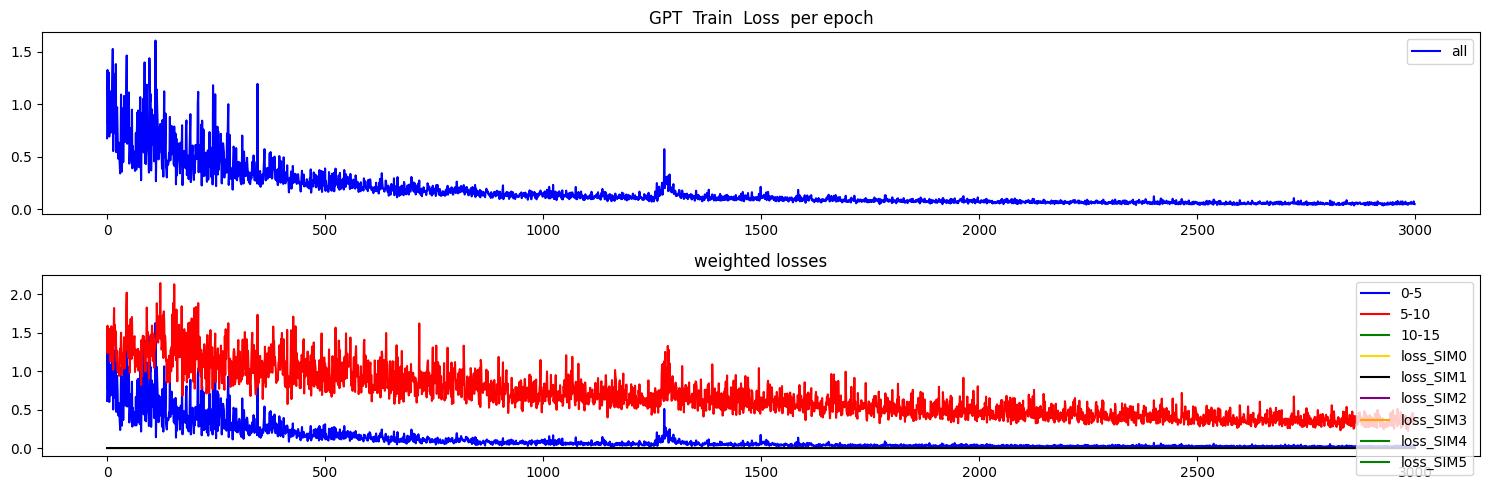

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


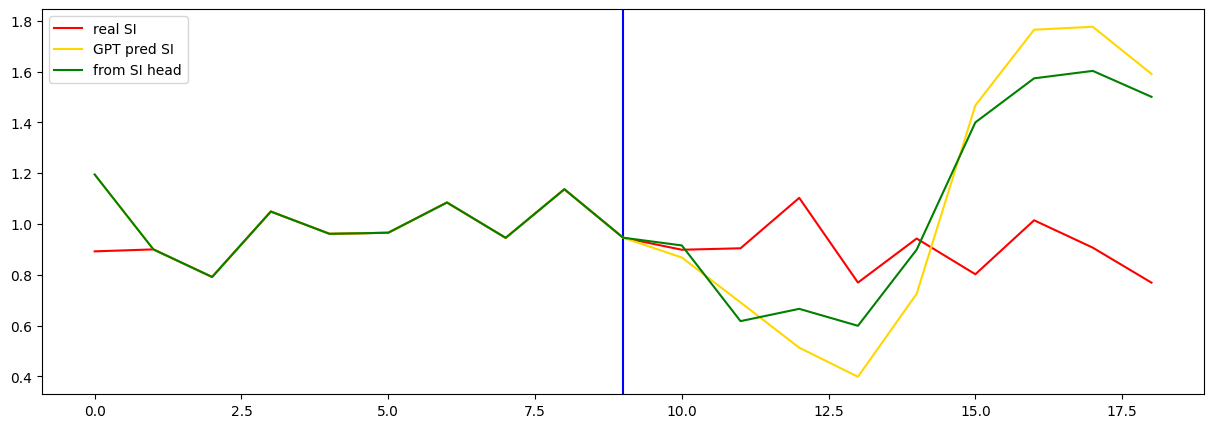

Testing R**2 - (all) - (no inputs):  0.7230802744213631
Testing R**2 - (f2) - SI full (no inputs):  -28.81685510330003
0 ...index R**2 (no inputs):  -1.4276891174053623
1 ...index R**2 (no inputs):  -7.490359265894513
2 ...index R**2 (no inputs):  -28.81685510330003
3 ...index R**2 (no inputs):  -4159.8449002665775
4 ...index R**2 (no inputs):  -2653.845274962223
5 ...index R**2 (no inputs):  -924.2307754662381
6 ...index R**2 (no inputs):  -230.51250264207388
7 ...index R**2 (no inputs):  -553878.4305601259
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6232428983743206
10 ...index R**2 (no inputs):  0.2867877817772492
11 ...index R**2 (no inputs):  -70.26840435368425
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -34.98199727072562
16 ...index R**2 (no inputs):  -22.597427505491854
17 ...index R**2 (no inputs):  -289.47233880731864
18 ...index R**2 (no inputs):  -276.374172063

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.612047
Loss_SI: 0.5666947960853577 Loss_all: 1.0202209949493408
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.473576
Loss_SI: 0.3587475121021271 Loss_all: 1.5070358514785767
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.225294
Loss_SI: 0.16342779994010925 Loss_all: 0.782089352607727
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.192371
Loss_SI: 0.12337717413902283 Loss_all: 0.8133109211921692
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.144978
Loss_SI: 0.09982048720121384 Loss_all: 0.5513977408409119
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.067445
Loss_SI: 0.02630295418202877 Loss_all: 0.4377247393131256
Prediction shape: torch.Size([32, 35])
===


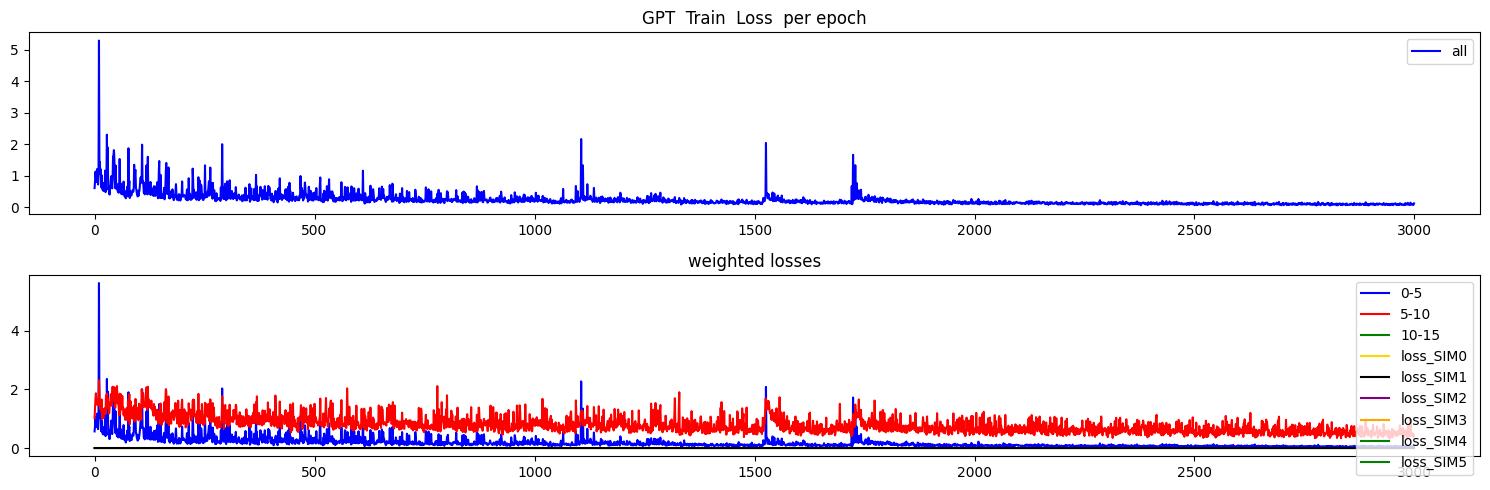

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


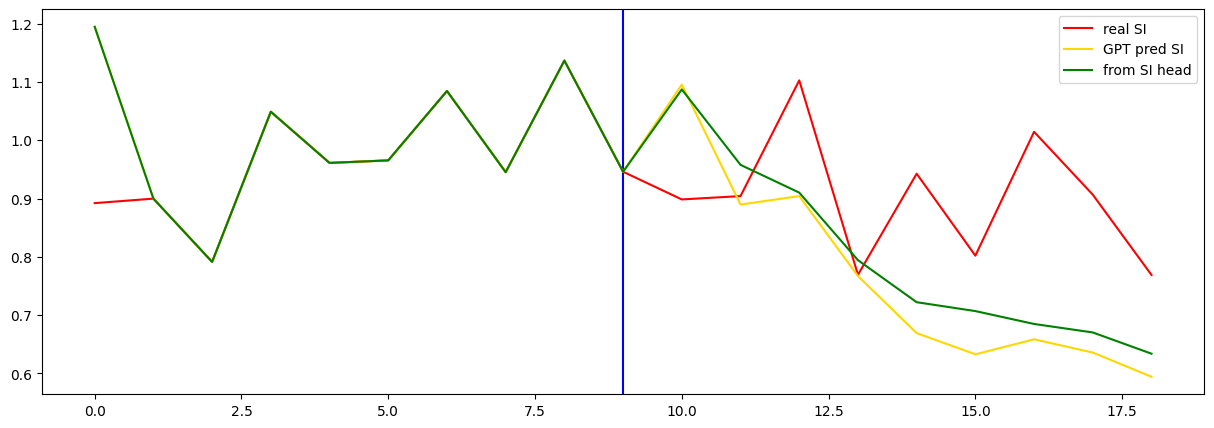

Testing R**2 - (all) - (no inputs):  0.9867817316353923
Testing R**2 - (f2) - SI full (no inputs):  -3.6225121723441553
0 ...index R**2 (no inputs):  0.04153029057468227
1 ...index R**2 (no inputs):  -0.19772103016740172
2 ...index R**2 (no inputs):  -3.6225121723441553
3 ...index R**2 (no inputs):  -549.3743031082579
4 ...index R**2 (no inputs):  -421.499197569106
5 ...index R**2 (no inputs):  -42.86455171536522
6 ...index R**2 (no inputs):  -491.2309024015374
7 ...index R**2 (no inputs):  -41983.57521387045
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06022924025683207
10 ...index R**2 (no inputs):  -0.30278078004929454
11 ...index R**2 (no inputs):  -706.7645771570814
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.109163507013051
16 ...index R**2 (no inputs):  -2.6688910024806543
17 ...index R**2 (no inputs):  -726.4907178758707
18 ...index R**2 (no inputs):  -4.39262378

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 1.173575
Loss_SI: 1.1625139713287354 Loss_all: 1.273126482963562
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.322417
Loss_SI: 0.23063063621520996 Loss_all: 1.1484898328781128
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.474444
Loss_SI: 0.4192771017551422 Loss_all: 0.9709503054618835
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.200459
Loss_SI: 0.08702942728996277 Loss_all: 1.2213205099105835
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.093640
Loss_SI: 0.0558634027838707 Loss_all: 0.4336307644844055
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102331
Loss_SI: 0.06508028507232666 Loss_all: 0.43758898973464966
Prediction shape: torch.Size([32, 35])
===


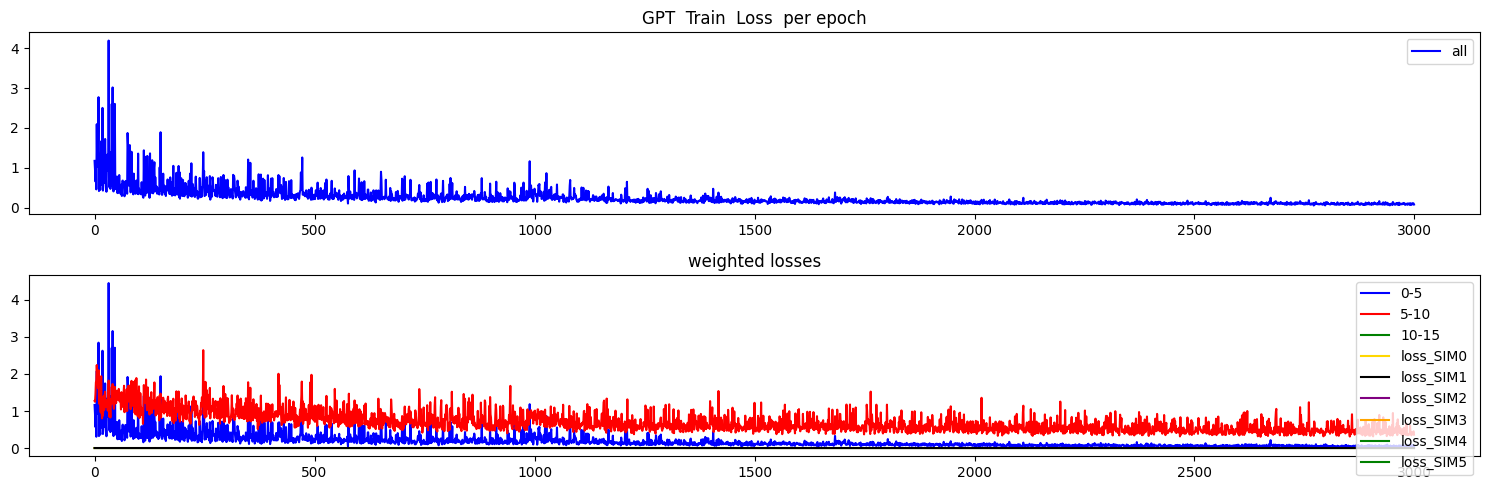

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


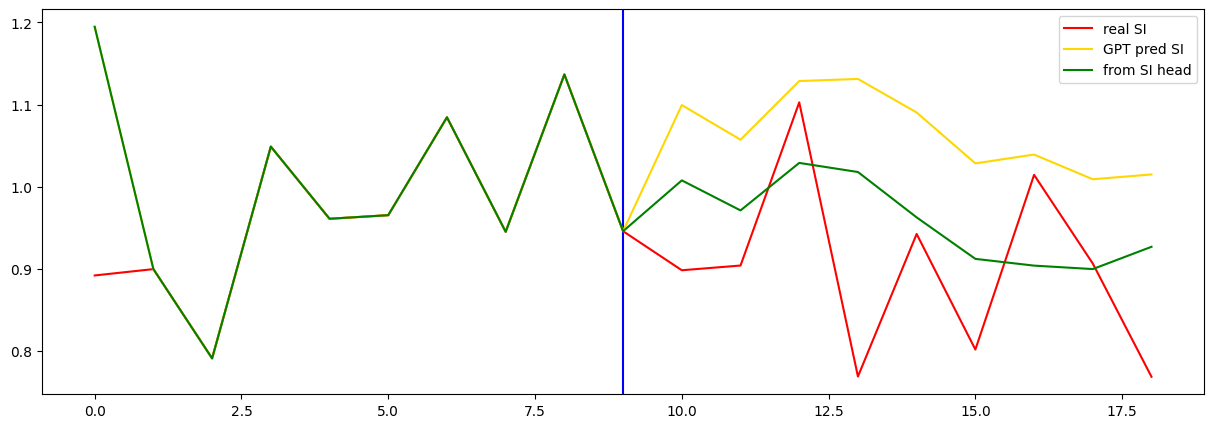

Testing R**2 - (all) - (no inputs):  0.9829003698523124
Testing R**2 - (f2) - SI full (no inputs):  -2.786012286565408
0 ...index R**2 (no inputs):  -0.125714039479641
1 ...index R**2 (no inputs):  0.0192514016236095
2 ...index R**2 (no inputs):  -2.786012286565408
3 ...index R**2 (no inputs):  -610.7157372130152
4 ...index R**2 (no inputs):  -917.0808991341397
5 ...index R**2 (no inputs):  -51.19451385689646
6 ...index R**2 (no inputs):  -39.57907720044456
7 ...index R**2 (no inputs):  -72774.75756151088
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.07194571973994102
10 ...index R**2 (no inputs):  -0.28987350225405195
11 ...index R**2 (no inputs):  -22.309447062621967
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -52.6310969660426
16 ...index R**2 (no inputs):  -0.5157388045081093
17 ...index R**2 (no inputs):  -14270.562851466171
18 ...index R**2 (no inputs):  -6.816528688444

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )
